# Uso de Twitter en periódos electorales - Internas de la ANR, Diciembre 2017

## Recolección de tweets basada en cuentas (@) y Hashtags (#)

Usando el API de Twitter recoletamos **tweets publicados entre el 27 de Noviembre 2017 y el 15 de Enero de 2018**, que provengan de cuentas de pre-candidatos de los principales partidos políticos (ANR), y/o contengan hashtags utilizados con fines electorales. Como base utilizamos las cuentas y hashtags publicados por el Diario Última Hora en su artículo [Perfiles de pre-candidatos según las redes](http://elecciones.ultimahora.com/informacion/?id=20). Por ejemplo, Última Hora reporta que el hashtag **#JuntosPodemosMas** es utilizado para identificar tweets vínculados al candidatos Santiago Peña de Honor Colorado. Así mismo, **#MaritoDeLaGente** se utilzan en tweets publicados en favor del candidato del movimiento Colorado Añeteté.

[Aquí](https://docs.google.com/spreadsheets/d/e/2PACX-1vQHoukfR9AFhSaz30QHYwKqpwexe1ASrW8ya25Fueh3jXcRPMSjrAyj4SbzryTLiuKkPdi6fsprqtM2/pubhtml) se puede acceder a lista completa de hashtags y cuentas.

## Tamaño del data set

In [1]:
%matplotlib inline

import os
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime

os.chdir('../..')

from src.utils.db_manager import *
from src.utils.data_wrangler import *
from src.analyzer.data_analyzer import *
from src.analyzer.network_analysis import NetworkAnalyzer

plt.style.use('seaborn')

In [2]:
db = DBManager('tweets')
total_tweets = db.search({'flag.partido_politico.anr': {'$gt': 0}}, only_relevant_tws=False).count()
print('Se recolectaron {0} tweets relacionados a la interna de la ANR'.format(total_tweets))

Se recolectaron 179454 tweets relacionados a la interna de la ANR


## Selección de tweets relevantes

Encontramos que los hashtags usados por los candidatos en sus campañas era también utilizados en otros contextos (en otros paises) por lo tanto para el estudio consideramos solo aquellos tweets que además de los hashtags de interés contienen alguna mención a cuentas de los candidatos.

In [3]:
#te = TweetEvaluator()
#te.identify_relevant_tweets()
relevant_tweets = db.search({'flag.partido_politico.anr': {'$gt': 0}}).count()
per_relevant = round(100*(relevant_tweets/total_tweets),0)
print('Del total de {0} tweets con hashtags relacionados a la campaña de la ANR, seleccionamos {1} que encontramos ' \
      'relevantes para el trabajo ({2}% del total)'.
      format(total_tweets, relevant_tweets, per_relevant))

Del total de 179454 tweets con hashtags relacionados a la campaña de la ANR, seleccionamos 145615 que encontramos relevantes para el trabajo (81.0% del total)


## Número de perfiles autores de tweets

In [85]:
dbu = DBManager('users')
#unique_tw_authors = db.get_unique_users(**{'partido':'anr'})
unique_tw_authors = dbu.search({'party': 'anr'})

In [5]:
print('En total {0} perfiles publicaron tweets, retweets, replies, y citaciones relacionadas a las internas del partido colorado'.format(unique_tw_authors.count()))

En total 23796 perfiles publicaron tweets, retweets, replies, y citaciones relacionadas a las internas del partido colorado


## Tipos de tweets

#### Tweets Originales

In [47]:
original_tweets_anr = db.search({'flag.partido_politico.anr': {'$gt': 0},
                                 'relevante': 1,
                                 'tweet_obj.retweeted_status': {'$exists': 0},
                                 'tweet_obj.in_reply_to_status_id_str': {'$eq': None},
                                 'tweet_obj.is_quote_status': False})
num_original_tweets_anr = original_tweets_anr.count()

#### Retweets

In [48]:
retweets_anr = db.search({'flag.partido_politico.anr': {'$gt': 0},
                          'relevante': 1,
                          'tweet_obj.retweeted_status': {'$exists': 1},
                          'tweet_obj.in_reply_to_status_id_str': {'$eq': None},
                          'tweet_obj.is_quote_status': False})
num_retweets_anr = retweets_anr.count()

#### Replies

In [49]:
replies_anr = db.search({'flag.partido_politico.anr': {'$gt': 0},
                         'relevante': 1,
                         'tweet_obj.retweeted_status': {'$exists': 0},
                         'tweet_obj.in_reply_to_status_id_str': {'$ne': None},
                         'tweet_obj.is_quote_status': False})
num_replies_anr = replies_anr.count()

#### Quotes

In [50]:
quotes_anr = db.search({'flag.partido_politico.anr': {'$gt': 0},
                        'relevante': 1,
                        'tweet_obj.is_quote_status': True})
num_quotes_anr = quotes_anr.count()

#### Gráfico

In [51]:
tweets_por_tipo_anr = pd.DataFrame({
    'Tipo': ['Original', 'Retweet', 'Reply', 'Quote'],
    'Tweets': [num_original_tweets_anr, num_retweets_anr, num_replies_anr, num_quotes_anr]
}, index=['ot', 'rt', 'rp', 'qt'])

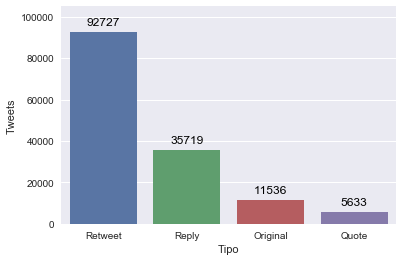

In [52]:
fig = sns.barplot(x='Tipo', y='Tweets', data=tweets_por_tipo_anr, order=['Retweet', 'Reply', 'Original', 'Quote'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,105000) #To make space for the annotations
plt.show()

### Honor Colorado

#### Tweets Originales

In [58]:
original_tweets_hc = db.search({'flag.partido_politico.anr': {'$gt': 0},
                                'flag.movimiento.honor colorado': {'$gt': 0}, 
                                'flag.movimiento.colorado añetete': {'$eq': 0},
                                'relevante': 1,
                                'tweet_obj.retweeted_status': {'$exists': 0},
                                'tweet_obj.in_reply_to_status_id_str': {'$eq': None},
                                'tweet_obj.is_quote_status': False})
num_original_tweets_hc = original_tweets_hc.count()

#### Retweets

In [59]:
retweets_hc = db.search({'flag.partido_politico.anr': {'$gt': 0},
                         'flag.movimiento.honor colorado': {'$gt': 0}, 
                         'flag.movimiento.colorado añetete': {'$eq': 0},
                         'relevante': 1,
                         'tweet_obj.retweeted_status': {'$exists': 1},
                         'tweet_obj.in_reply_to_status_id_str': {'$eq': None},
                         'tweet_obj.is_quote_status': False})
num_retweets_hc = retweets_hc.count()

#### Replies

In [60]:
replies_hc = db.search({'flag.partido_politico.anr': {'$gt': 0},
                        'flag.movimiento.honor colorado': {'$gt': 0}, 
                        'flag.movimiento.colorado añetete': {'$eq': 0},
                        'relevante': 1,
                        'tweet_obj.retweeted_status': {'$exists': 0},
                        'tweet_obj.in_reply_to_status_id_str': {'$ne': None},
                        'tweet_obj.is_quote_status': False})
num_replies_hc = replies_hc.count()

#### Quotes

In [61]:
quotes_hc = db.search({'flag.partido_politico.anr': {'$gt': 0},
                       'flag.movimiento.honor colorado': {'$gt': 0}, 
                       'flag.movimiento.colorado añetete': {'$eq': 0},
                       'relevante': 1,
                       'tweet_obj.is_quote_status': True})
num_quotes_hc = quotes_hc.count()

#### Gráfico

In [57]:
tweets_por_tipo_hc = pd.DataFrame({
    'Tipo': ['Original', 'Retweet', 'Reply', 'Quote'],
    'Tweets': [num_original_tweets_hc, num_retweets_hc, num_replies_hc, num_quotes_hc]
}, index=['ot', 'rt', 'rp', 'qt'])

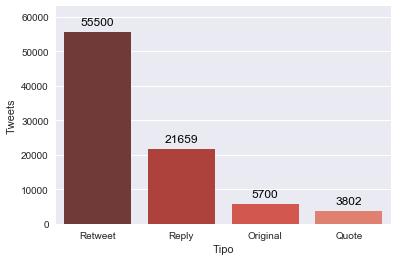

In [58]:
fig = sns.barplot(x='Tipo', y='Tweets', data=tweets_por_tipo_hc, order=['Retweet', 'Reply', 'Original', 'Quote'],
                 palette="Reds_d")
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,63000) #To make space for the annotations
plt.show()

### Colorado Añeteté

#### Tweets Originales

In [62]:
original_tweets_ca = db.search({'flag.partido_politico.anr': {'$gt': 0},
                                'flag.movimiento.honor colorado': {'$eq': 0}, 
                                'flag.movimiento.colorado añetete': {'$gt': 0},
                                'relevante': 1,
                                'tweet_obj.retweeted_status': {'$exists': 0},
                                'tweet_obj.in_reply_to_status_id_str': {'$eq': None},
                                'tweet_obj.is_quote_status': False})
num_original_tweets_ca = original_tweets_ca.count()

#### Retweets

In [63]:
retweets_ca = db.search({'flag.partido_politico.anr': {'$gt': 0},
                         'flag.movimiento.honor colorado': {'$eq': 0}, 
                         'flag.movimiento.colorado añetete': {'$gt': 0},
                         'relevante': 1,
                         'tweet_obj.retweeted_status': {'$exists': 1},
                         'tweet_obj.in_reply_to_status_id_str': {'$eq': None},
                         'tweet_obj.is_quote_status': False})
num_retweets_ca = retweets_ca.count()

#### Replies

In [64]:
replies_ca = db.search({'flag.partido_politico.anr': {'$gt': 0},
                        'flag.movimiento.honor colorado': {'$eq': 0}, 
                        'flag.movimiento.colorado añetete': {'$gt': 0},
                        'relevante': 1,
                        'tweet_obj.retweeted_status': {'$exists': 0},
                        'tweet_obj.in_reply_to_status_id_str': {'$ne': None},
                        'tweet_obj.is_quote_status': False})
num_replies_ca = replies_ca.count()

#### Quotes

In [65]:
quotes_ca = db.search({'flag.partido_politico.anr': {'$gt': 0},
                       'flag.movimiento.honor colorado': {'$eq': 0}, 
                       'flag.movimiento.colorado añetete': {'$gt': 0},
                       'relevante': 1,
                       'tweet_obj.is_quote_status': True})
num_quotes_ca = quotes_ca.count()

#### Gráfico

In [63]:
tweets_por_tipo_ca = pd.DataFrame({
    'Tipo': ['Original', 'Retweet', 'Reply', 'Quote'],
    'Tweets': [num_original_tweets_ca, num_retweets_ca, num_replies_ca, num_quotes_ca]
}, index=['ot', 'rt', 'rp', 'qt'])

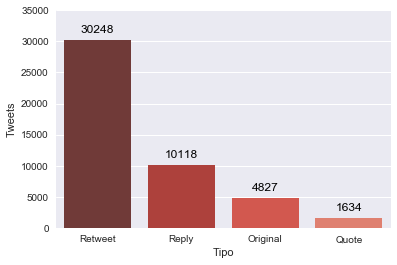

In [20]:
fig = sns.barplot(x='Tipo', y='Tweets', data=tweets_por_tipo_ca, order=['Retweet', 'Reply', 'Original', 'Quote'],
                 palette="Reds_d")
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,35000) #To make space for the annotations
plt.show()

Los conjuntos de tweets de **`Honor Colorado`** y **`Colorado Añeteté`** no son mutuamente excluyentes ya que existen tweets que contienen menciones a los candidatos de ambos movimientos o que tienen hashtags relacionados a los dos movimientos. Por ejemplo el siguiente tweet

In [21]:
class Tweet(object):
    def __init__(self, embed_str=None):
        self.embed_str = embed_str

    def _repr_html_(self):
        return self.embed_str

In [22]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="es" dir="ltr">.<a href="https://twitter.com/SantiPenap?ref_src=twsrc%5Etfw">@SantiPenap</a>: &quot;Me parece indignante que <a href="https://twitter.com/MaritoAbdo?ref_src=twsrc%5Etfw">@MaritoAbdo</a> siga recibiendo un salario del Estado y haciendo campaña. Si está seguro que va a ganar, le desafío a que mañana renuncie a su banca en <a href="https://twitter.com/SenadoresPy?ref_src=twsrc%5Etfw">@SenadoresPy</a>&quot; <a href="https://twitter.com/hashtag/COCPY?src=hash&amp;ref_src=twsrc%5Etfw">#COCPY</a></p>&mdash; Jorge Torres Romero (@jtorresromero) <a href="https://twitter.com/jtorresromero/status/937488208492941312?ref_src=twsrc%5Etfw">December 4, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

## Evolución de tweets en el tiempo

### General

In [23]:
tw_by_date = db.get_tweets_by_date(**{'partido': 'anr'})
tweets_por_fecha = pd.DataFrame(tw_by_date)
tweets_por_fecha.head()

,_id,count,date,partido
0,11/24/17,89,2017-11-24,anr
1,11/25/17,283,2017-11-25,anr
2,11/26/17,334,2017-11-26,anr
3,11/27/17,489,2017-11-27,anr
4,11/28/17,527,2017-11-28,anr


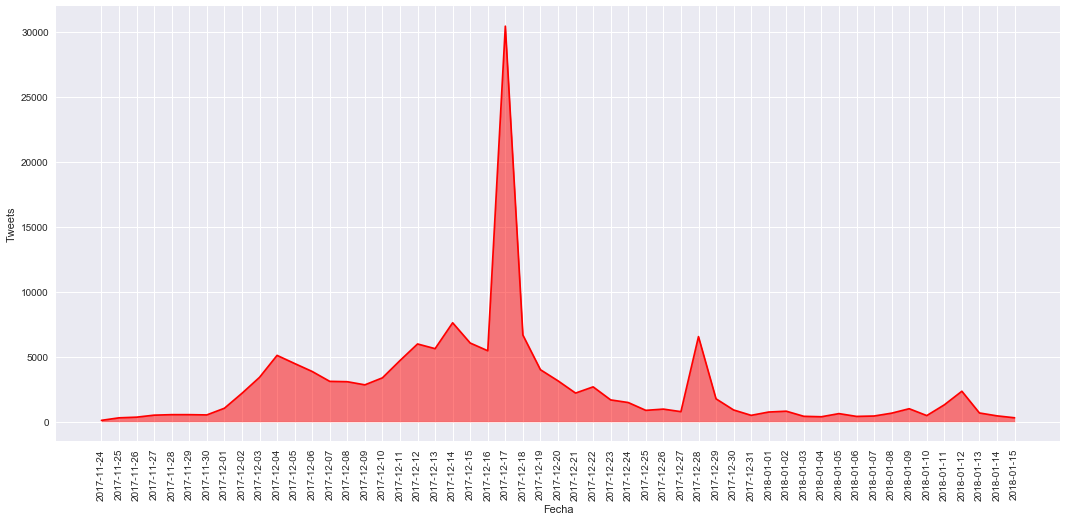

In [24]:
plt.figure(figsize=(18,8))
# get list of indexes
l_index = list(tweets_por_fecha.index)
# convert timestamps to string
l_dates = []
for i in range(tweets_por_fecha.shape[0]):
    l_dates.append(str(tweets_por_fecha.iloc[i, 2]).split()[0])
fig = sns.lineplot(x=l_dates, y=tweets_por_fecha['count'], color="red")
fig.set(xlabel='Fecha', ylabel='Tweets')
sns.set_style("dark", {'axes.grid': True})
fig.set_xticklabels(labels=l_dates, rotation=90)
plt.fill_between(l_index, tweets_por_fecha['count'], alpha=0.5, color='red')
plt.show()
fig.get_figure().savefig("tweets_over_time.png", dpi=200, quality=95, bbox_inches="tight")

### Por movimiento

In [25]:
# get tweets by date
tw_by_date_hc = db.get_tweets_by_date(**{'partido':'anr', 'movimiento': 'honor colorado', 
                                         'no_movimiento': 'colorado añetete'})
tw_by_date_ca = db.get_tweets_by_date(**{'partido':'anr', 'movimiento': 'colorado añetete',
                                         'no_movimiento': 'honor colorado'})
# convert list to pandas' dataframe
tweets_por_fecha = pd.DataFrame(tw_by_date_hc)
tweets_por_fecha = tweets_por_fecha.append(pd.DataFrame(tw_by_date_ca))

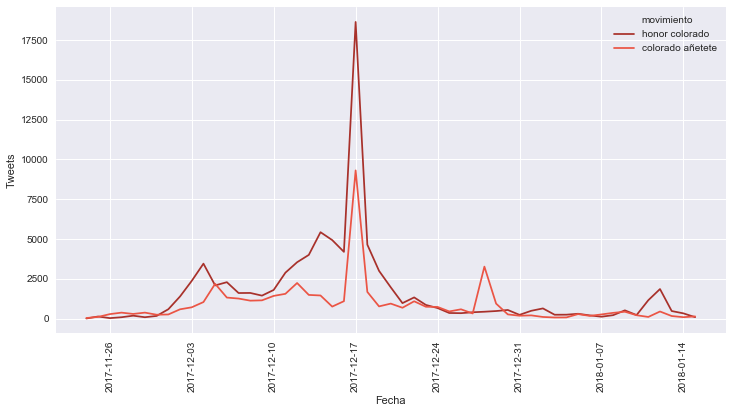

In [26]:
# draw and show the figure
# set figure size
plt.figure(figsize=(12,6))
fig = sns.lineplot(x='date', y='count', data=tweets_por_fecha, hue="movimiento", 
                    palette="Reds_d")
fig.set(xlabel='Fecha', ylabel='Tweets')
for item in fig.get_xticklabels():
    item.set_rotation(90)
plt.show()
fig.get_figure().savefig("tweets_over_time_movimientos.png", dpi=200, quality=95)

La publicación de tweets fue creciendo con el paso del tiempo. El día de las elecciones (**`17 de diciembre`**) se concentró el mayor de publicaciones de tweets, más de **`30.000`** tweets (honor colorado 20.478, colorado añeteté 11.474) se publicaron ese día. Pasadas las elecciones los tweets relacionados a las internas decrecieron significativamente con un pequeño pico el día de 28 de diciembre. Esto pudo haberse debido a que ese día el presidente de la república y líder del Movimiento Honor Colorado, Horacio Cartes, confirmó su reunión con Mario Abdo Benítez, líder de Colorado Añeteté, en busca de la unidad del Partido Colorado ([Cartes confirma abrazo republicano](http://www.abc.com.py/nacionales/cartes-confirma-abrazo-republicano-1662344.html)).

## Cantidad de Tweets por movimiento

Exploraremos la distribución de tweets considerando los dos movimiento más importantes en estas internas, es decir **`Honor Colorado`** y **`Colorado Añeteté`**.

### Honor Colorado

In [67]:
tweets_hc = db.search({'flag.partido_politico.anr': {'$gt': 0},
                       'flag.movimiento.honor colorado': {'$gt': 0}, 
                       'flag.movimiento.colorado añetete': {'$eq': 0},
                       'relevante': 1})
print('Se publicaron {0} tweets relacionados al movimiento Honor Colorado ({1}% del total)'.
      format(tweets_hc.count(), round((tweets_hc.count()/relevant_tweets)*100,2)))

Se publicaron 86661 tweets relacionados al movimiento Honor Colorado (59.51% del total)


### Colorado Añeteté

In [68]:
tweets_ca = db.search({'flag.partido_politico.anr': {'$gt': 0},
                       'flag.movimiento.colorado añetete': {'$gt': 0},
                       'flag.movimiento.honor colorado': {'$eq': 0},
                       'relevante': 1})
print('Se publicaron {0} tweets relacionados al movimiento Colorado Añetete ({1}% del total)'.
      format(tweets_ca.count(), round((tweets_ca.count()/relevant_tweets)*100,2)))

Se publicaron 46827 tweets relacionados al movimiento Colorado Añetete (32.16% del total)


### Ambos

In [67]:
tweets_hc_ca = db.search({'flag.partido_politico.anr': {'$gt': 0},
                          'flag.movimiento.colorado añetete': {'$gt': 0},
                          'flag.movimiento.honor colorado': {'$gt': 0},
                          'relevante': 1})
print('Se publicaron {0} tweets relacionados a ambos movimientos ({1}% del total)'.
      format(tweets_hc_ca.count(), round((tweets_hc_ca.count()/relevant_tweets)*100,2)))

Se publicaron 10918 tweets relacionados a ambos movimientos (7.5% del total)


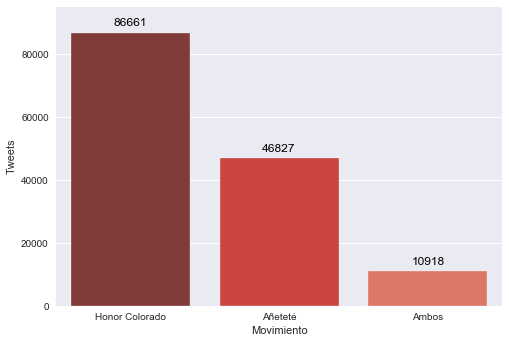

In [30]:
tweets_por_movimiento = pd.DataFrame({
    'Movimiento': ['Honor Colorado', 'Añeteté', 'Ambos'],
    'Tweets': [tweets_hc.count(), tweets_ca.count(), tweets_hc_ca.count()]
}, index=['hc', 'ca', 'ambos'])
fig = sns.barplot(x='Movimiento', y='Tweets', data=tweets_por_movimiento, palette="Reds_d")
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,95000) #To make space for the annotations
plt.show()

Los tweets relacionados al movimiento **`Honor Colorado`** constituyen casi el **`60%`** de nuestro data set mientras que los vinculados a las candidaturas del movimiento **`Colorado Añeteté`** representan menos del **`35%`** del total de datos. El restante porcentaje se distribuye entre tweet que hacen referencia a ambos movimiento (7%) y tweets vínculados a las internas de la ANR pero no necesariamente a alguno de estos dos movimiento, por ejemplo, tweets que utilizan solamente el hashtag **`#InternasANR`**.

## Hashtags y Menciones por Movimiento

In [116]:
from src.utils.utils import get_user_handlers_and_hashtags
user_handlers, hashtags = get_user_handlers_and_hashtags()
print('User Handlers')
print(user_handlers)
print('Hashtags')
print(hashtags)

User Handlers
['@santipenap', '@horacio_cartes', '@equipo_anetete', '@maritoabdo', '@efrainalegre', '@carlosmateopy', '@leitorubin', '@frenteguasupy', '@srasmusseng', '@fidelzavala2018', '@sebavillarejo', '@rociovallejoa']
Hashtags
['#honorcolorado', '#juntospodemosmas', '#juntoshagamosmás', '#votoxsanti', '#estoyconsanti', '#caminandojuntos', '#territoriohonorcolorado', '#sigamosconversando', '#santipresidente', '#lista2', '#coloradosdebien', '#maritodelagente', '#coloradoañetete', '#paraguaydelagente', '#maritoimparable', '#maritopresidente', '#lista3', '#1000kmconlagente', '#lista4', '#tuma', '#tuma2018', '#tumasenador', '#lista5', '#nicanorsenador', '#internasanr', '#paraguayelige', '#esahora', '#vamosaganartodos', '#votálista7', '#carlosmateopresidente', '#internasplra', '#renovemos', '#elcambiojuntos', '#elegibien', '#elegi100']


### Honor Colorado

In [117]:
tweets_hc_hm = db.search({'flag.partido_politico.anr': {'$gt': 0},
                          'flag.movimiento.honor colorado': {'$gt': 0}, 
                          'flag.movimiento.colorado añetete': {'$eq': 0},
                          'relevante': 1})
total_tweets_hc = tweets_hc_hm.count()

In [118]:
only_ht, only_m, both_htm = 0, 0, 0
for tweet_hc in tweets_hc_hm:
    found_ht, found_m = 0, 0
    tweet_keywords = tweet_hc['flag']['keyword']
    for keyword in tweet_keywords:
        if '@' not in keyword:
            k_handler = '@' + keyword.lower()
        else:
            k_handler = keyword.lower()
        if k_handler in user_handlers:
            found_m += 1
        else:
            if '#' not in keyword:
                k_hashtag = '#' + keyword.lower()
            else:
                k_hashtag = keyword.lower()
            if k_hashtag in hashtags:
                found_ht += 1
    if found_m > 0 and found_ht > 0:
        both_htm += 1
    elif found_m > 0:
        only_m += 1
    elif found_ht > 0:
        only_ht += 1
    else:
        print('Error!, the tweet {0} doesnt have neither hashtags nor user handlers'.
              format(tweet_hc['tweet_obj']['id_str']))
print('De los {0} tweets de HC, {1} contienen solo hashtags, {2} solo menciones, y {3} ambos'.
      format(total_tweets_hc, only_ht, only_m, both_htm))

De los 86661 tweets de HC, 764 contienen solo hashtags, 76328 solo menciones, y 9569 ambos


In [120]:
print('{0}% tuvieron solo menciones'.format(round(100*(only_m/total_tweets_hc)),0))

88% tuvieron solo menciones


### Colorado Añeteté

In [123]:
tweets_ca_hm = db.search({'flag.partido_politico.anr': {'$gt': 0},
                          'flag.movimiento.colorado añetete': {'$gt': 0},
                          'flag.movimiento.honor colorado': {'$eq': 0},
                          'relevante': 1})
total_tweets_ca = tweets_ca_hm.count()

In [124]:
only_ht, only_m, both_htm = 0, 0, 0
for tweet_ca in tweets_ca_hm:
    found_ht, found_m = 0, 0
    tweet_keywords = tweet_ca['flag']['keyword']
    for keyword in tweet_keywords:
        if '@' not in keyword:
            k_handler = '@' + keyword.lower()
        else:
            k_handler = keyword.lower()
        if k_handler in user_handlers:
            found_m += 1
        else:
            if '#' not in keyword:
                k_hashtag = '#' + keyword.lower()
            else:
                k_hashtag = keyword.lower()
            if k_hashtag in hashtags:
                found_ht += 1
    if found_m > 0 and found_ht > 0:
        both_htm += 1
    elif found_m > 0:
        only_m += 1
    elif found_ht > 0:
        only_ht += 1
    else:
        print('Error!, the tweet {0} doesnt have neither hashtags nor user handlers'.
              format(tweet_ca['tweet_obj']['id_str']))
print('De los {0} tweets de CA, {1} contienen solo hashtags, {2} solo menciones, y {3} ambos'.
      format(total_tweets_ca, only_ht, only_m, both_htm))

De los 46827 tweets de CA, 1144 contienen solo hashtags, 34718 solo menciones, y 10965 ambos


In [125]:
print('{0}% tuvieron solo menciones'.format(round(100*(only_m/total_tweets_ca)),0))

74% tuvieron solo menciones


## Cantidad de Tweets por Movimiento por día

### Honor Colorado

In [31]:
mean_tweets_hc = tweets_por_fecha[tweets_por_fecha['movimiento']=='honor colorado']['count'].mean()
print('Honor Colorado publicó en promedio {0} tweets por día'.format(int(mean_tweets_hc)))

Honor Colorado publicó en promedio 1635 tweets por día


### Colorado Añeteté

In [32]:
mean_tweets_ca = tweets_por_fecha[tweets_por_fecha['movimiento']=='colorado añetete']['count'].mean()
print('Colorado Añeteté publicó en promedio {0} tweets por día'.format(int(mean_tweets_ca)))

Colorado Añeteté publicó en promedio 883 tweets por día


## Frecuencia de posteo

In [33]:
fp = db.get_posting_frequency_in_seconds(**{'partido': 'anr'})
fp_df = pd.DataFrame(fp)

In [34]:
print('En promedio se publicaron tweets relacionados a la internas del Partido Colorado cada {0} segundos'.
      format(round(fp_df['diff_with_previous'].mean(), 2)))

En promedio se publicaron tweets relacionados a la internas del Partido Colorado cada 30.94 segundos


### Honor Colorado

In [35]:
fp_hc = db.get_posting_frequency_in_seconds(**{'partido': 'anr', 'movimiento': 'honor colorado',
                                               'no_movimiento': 'colorado añetete'})
fp_hc_df = pd.DataFrame(fp_hc)

In [36]:
print('En promedio se publicaron tweets relacionados al movimiento Honor Colorado cada {0} segundos'.
      format(round(fp_hc_df['diff_with_previous'].mean(), 2)))

En promedio se publicaron tweets relacionados al movimiento Honor Colorado cada 51.88 segundos


### Colorado Añeteté

In [37]:
fp_ca = db.get_posting_frequency_in_seconds(**{'partido': 'anr', 'movimiento': 'colorado añetete',
                                               'no_movimiento': 'honor colorado'})
fp_ca_df = pd.DataFrame(fp_ca)

In [38]:
print('En promedio se publicaron tweets relacionados al movimiento Colorado Añeteté cada {0} segundos'.
      format(round(fp_ca_df['diff_with_previous'].mean(), 2)))

En promedio se publicaron tweets relacionados al movimiento Colorado Añeteté cada 96.18 segundos


## Distribución de tweets por hora el día D (17/12/17)

In [39]:
# get tweets by hour by movement
hc_tw_by_hour = db.get_tweets_by_hour('12/17/17', **{'partido': 'anr','movimiento': 'honor colorado',
                                                     'no_movimiento': 'colorado añetete'})
ca_tw_by_hour = db.get_tweets_by_hour('12/17/17', **{'partido': 'anr','movimiento': 'colorado añetete',
                                                     'no_movimiento': 'honor colorado'})
# convert list to pandas' dataframe
tweets_by_hour = pd.DataFrame(hc_tw_by_hour)
tweets_by_hour = tweets_by_hour.append(pd.DataFrame(ca_tw_by_hour))

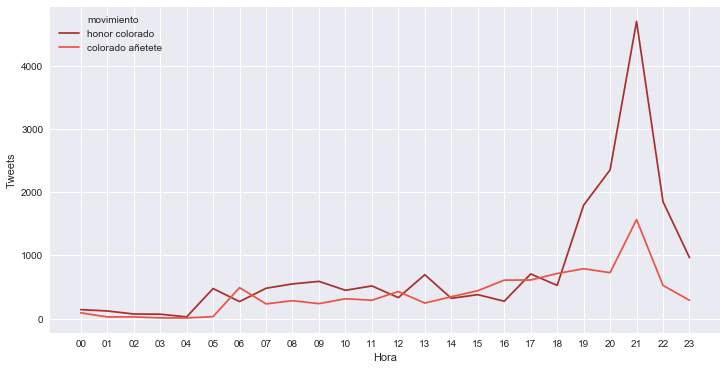

In [40]:
# set figure size
plt.figure(figsize=(12,6))
# draw and show the figure
fig = sns.lineplot(x='hour', y='count', data=tweets_by_hour, hue="movimiento", 
                    palette="Reds_d")
fig.set(xlabel='Hora', ylabel='Tweets')
#for item in fig.get_xticklabels():
#    item.set_rotation(90)
plt.show()
fig.get_figure().savefig("tweets_dia_d_por_movimiento.png", dpi=200, quality=95, bbox_inches="tight")

La cantidad de tweets con información relacionada a **`Honor Colorado`** fue superior durante toda la jornada electoral con respecto a los tweets de **`Colorado Añeteté`**, inclusive aún después de la proclamación del TREP (20 hs)

### ¿Qué pasó entre las 20 y las 21 hs?

In [14]:
tweets = db.search({'tweet_py_date': '12/17/17', 
                    '$or': [{'tweet_py_hour': '21'}, {'tweet_py_hour': '20'}], 
                    'flag.partido_politico.anr': {'$gt': 0},
                    'flag.movimiento.honor colorado': {'$gt': 0}, 
                    'flag.movimiento.colorado añetete': {'$eq': 0}})
org_tweets, rts, rps, qts = [], [], [], []
tweets_rt = defaultdict(int)
for tweet in tweets:
    if 'retweeted_status' in tweet['tweet_obj'].keys() and \
        not tweet['tweet_obj']['in_reply_to_status_id_str'] and \
        not tweet['tweet_obj']['is_quote_status']:
        rts.append({'id_str': tweet['tweet_obj']['id_str'], 
                    'author': tweet['tweet_obj']['user']['screen_name']})
        key = 'https://www.twitter.com/' + tweet['tweet_obj']['retweeted_status']['user']['screen_name'] + \
              '/status/' + tweet['tweet_obj']['retweeted_status']['id_str']
        tweets_rt[key] += 1
    elif 'retweeted_status' not in tweet['tweet_obj'].keys() and \
         tweet['tweet_obj']['in_reply_to_status_id_str'] and \
         not tweet['tweet_obj']['is_quote_status']:
        rps.append({'id_str': tweet['tweet_obj']['id_str'], 'author': tweet['tweet_obj']['user']['screen_name']})
    elif tweet['tweet_obj']['is_quote_status']:
        qts.append({'id_str': tweet['tweet_obj']['id_str'], 'author': tweet['tweet_obj']['user']['screen_name']})
    else:
        org_tweets.append({'id_str': tweet['tweet_obj']['id_str'], 'author': tweet['tweet_obj']['user']['screen_name']})
print('Tweet originales: {0}'.format(len(org_tweets)))
print('RT: {0}'.format(len(rts)))
print('RP: {0}'.format(len(rps)))
print('QT: {0}'.format(len(qts)))

Tweet originales: 501
RT: 5207
RP: 1075
QT: 258


In [15]:
s_rt_tweets = [k for k in sorted(tweets_rt.items(), key=lambda k_v: k_v[1], reverse=True)]

In [16]:
s_rt_tweets[0]

('https://www.twitter.com/LuisBareiro/status/942544597410045953', 1434)

## Distribución de tweets por candidato

Para esta parte del análisis solo se tuvieron en cuenta los tweets que contienen hashtags utilizados exclusivamente para promocionar las **candidaturas** presidenciales, no los **movimientos** o **partidos**. Por ejemplo, los hashtags **`#JuntosPodemosMas`** o **`#CaminandoJuntos`** son hashtags vinculados principalmente a la figura de Santiago Peña no así el hashtag **`#HonorColorado`** que se utiliza para referirse al movimiento partidario pero no necesariamente la candidatura de Peña. De igual manera, los hashtags **`#MaritoDeLaGente`** o **`ParaguayDeLaGente`** fueron usados para promocionar la campaña de Mario Abdo, no necesariamente las candidatura del movimiento Colorado Añeteté al que pertenece.

Los tweets publicados por las cuentas personales de los candidatos no son tenidos en cuenta en este análisis.

### Santiago Peña

Hashtags de ejemplo: **`#JuntosPodemosMas`**, **`#CaminandoJuntos`**, **`#SantiPresidente`**, **`#VotoxSanti`**, **`#SigamosConversando`**

In [41]:
tweets_sp = db.search({'flag.partido_politico.anr': {'$gt': 0},
                       'flag.candidatura.santiago peña': {'$gt': 0},
                       'flag.candidatura.mario abdo': {'$eq': 0},
                       'flag.movimiento.colorado añetete': {'$eq': 0},
                       'tweet_obj.user.screen_name': {'$ne': 'SantiPenap'},
                       'relevante': {'$eq': 1}})
per_tweet_sp = round((tweets_sp.count()/tweets_hc.count())*100,2)
print('Se publicaron {0} tweets que utilizaron hashtags vinculados a la candidatura de Santiago Peña ' \
      '({1}% del total de los tweets de Honor Colorado)'.
      format(tweets_sp.count(), per_tweet_sp))

Se publicaron 58619 tweets que utilizaron hashtags vinculados a la candidatura de Santiago Peña (67.64% del total de los tweets de Honor Colorado)


### Mario Abdo Benítez

Hashtags de ejemplo: **`#MaritoDeLaGente`**, **`#ParaguayDeLaGente`**, **`#MaritoImparable`**, **`#MaritoPresidente`**, **`#1000KmConLaGente`**

In [42]:
tweets_ma = db.search({'flag.partido_politico.anr': {'$gt': 0},
                       'flag.candidatura.santiago peña': {'$eq': 0},
                       'flag.candidatura.mario abdo': {'$gt': 0},
                       'flag.movimiento.honor colorado': {'$eq': 0},
                       'tweet_obj.user.screen_name': {'$ne': 'maritoabdo'},
                       'relevante': {'$eq': 1}})
per_tweet_ma = round((tweets_ma.count()/tweets_ca.count())*100,2)
print('Se publicaron {0} tweets que utilizaron hashtags vinculados a la candidatura de Mario Abdo ' \
      '({1}% del total de los tweets de Colorado Añeteté)'.
      format(tweets_ma.count(), per_tweet_ma))

Se publicaron 46340 tweets que utilizaron hashtags vinculados a la candidatura de Mario Abdo (98.96% del total de los tweets de Colorado Añeteté)


### Tweets sobre candidatos sobre el total de su movimiento

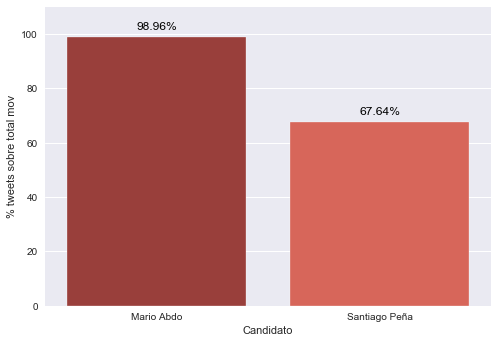

In [43]:
tweets_por_candidato_anr = pd.DataFrame({
    'Candidato': ['Santiago Peña', 'Mario Abdo'],
    '% tweets sobre total mov': [per_tweet_sp,per_tweet_ma]
}, index=['sp', 'ma'])
fig = sns.barplot(x='Candidato', y='% tweets sobre total mov', data=tweets_por_candidato_anr, 
                  order=['Mario Abdo', 'Santiago Peña'], palette="Reds_d")
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("{0}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,110) #To make space for the annotations
plt.show()

### Sin tweets negativos

In [44]:
# Tweets HC no negativos
tweets_hc_nn = db.search({'flag.partido_politico.anr': {'$gt': 0},
                          'flag.movimiento.honor colorado': {'$gt': 0}, 
                          'flag.movimiento.colorado añetete': {'$eq': 0},
                          'relevante': 1,
                          'sentimiento.tono': {'$ne': 'negative'}})
tweets_hc_nn.count()

70533

In [45]:
# Tweets Santi Peña no negativos
tweets_sp_nn = db.search({'flag.partido_politico.anr': {'$gt': 0},
                          'flag.candidatura.santiago peña': {'$gt': 0},
                          'flag.candidatura.mario abdo': {'$eq': 0},
                          'flag.movimiento.colorado añetete': {'$eq': 0},
                          'tweet_obj.user.screen_name': {'$ne': 'SantiPenap'},
                          'sentimiento.tono': {'$ne': 'negative'},
                          'relevante': 1})
per_tweet_sp_nn = round((tweets_sp_nn.count()/tweets_hc_nn.count())*100,2)
per_tweet_sp_nn

68.38

In [46]:
# Tweets Colorado Añeteté no negativos
tweets_ca_nn = db.search({'flag.partido_politico.anr': {'$gt': 0},
                          'flag.movimiento.honor colorado': {'$eq': 0}, 
                          'flag.movimiento.colorado añetete': {'$gt': 0},
                          'relevante': 1,
                          'sentimiento.tono': {'$ne': 'negative'}})
tweets_ca_nn.count()

40727

In [47]:
# Tweets Mario Abdo no negativos
tweets_ma_nn = db.search({'flag.partido_politico.anr': {'$gt': 0},
                          'flag.candidatura.santiago peña': {'$eq': 0},
                          'flag.candidatura.mario abdo': {'$gt': 0},
                          'flag.movimiento.honor colorado': {'$eq': 0},
                          'tweet_obj.user.screen_name': {'$ne': 'maritoabdo'},
                          'sentimiento.tono': {'$ne': 'negative'},
                          'relevante': 1})
per_tweet_ma_nn = round((tweets_ma_nn.count()/tweets_ca_nn.count())*100,2)
per_tweet_ma_nn

98.88

## Tonalidad de Tweets

En este análisis se consideran solo tweets originales, replies, y quotes. Los retweets son descartados.

In [48]:
st = db.get_sentiment_tweets(**{'partido': 'anr'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df = pd.DataFrame(st_dict)

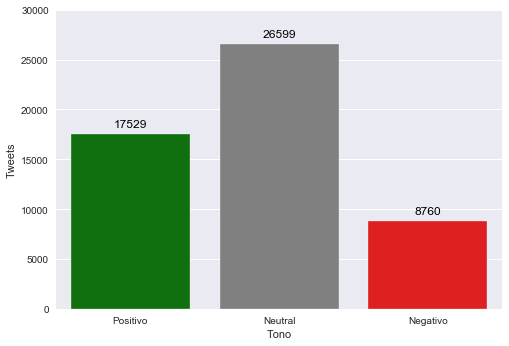

In [49]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,30000) #To make space for the annotations
plt.show()

### Honor Colorado

In [50]:
st = db.get_sentiment_tweets(**{'partido': 'anr', 'movimiento': 'honor colorado', 
                                'no_movimiento': 'colorado añetete'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_hc = pd.DataFrame(st_dict)

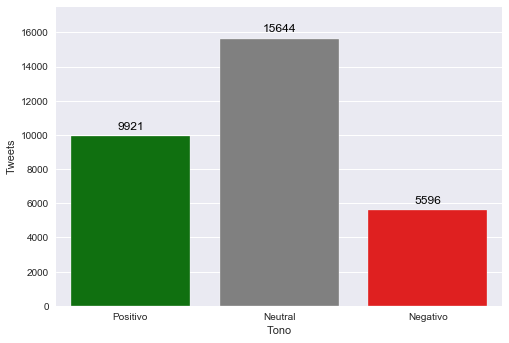

In [52]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_hc, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,17500) #To make space for the annotations
plt.show()

In [53]:
total = sum(st_df_hc['Tweets'])
positive = int(st_df_hc[st_df_hc['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_hc[st_df_hc['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_hc[st_df_hc['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 31.8%
Tweets Negativos: 18.0%
Tweets Neutrales: 50.2%


#### Tweets Originales

In [54]:
st = db.get_sentiment_tweets(type_query='original', **{'partido': 'anr', 'movimiento': 'honor colorado',
                                                       'no_movimiento': 'colorado añetete'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_hc = pd.DataFrame(st_dict)

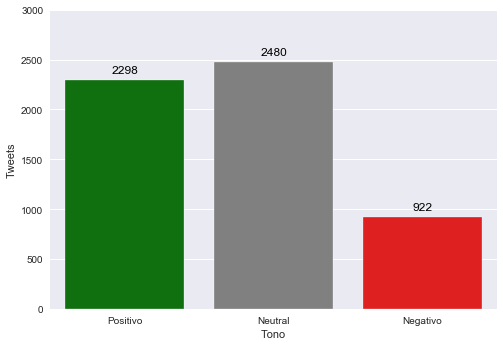

In [56]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_hc, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,3000) #To make space for the annotations
plt.show()

In [57]:
total = sum(st_df_hc['Tweets'])
positive = int(st_df_hc[st_df_hc['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_hc[st_df_hc['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_hc[st_df_hc['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 40.3%
Tweets Negativos: 16.2%
Tweets Neutrales: 43.5%


#### Replies

In [58]:
st = db.get_sentiment_tweets(type_query='replies', **{'partido': 'anr', 'movimiento': 'honor colorado',
                                                      'no_movimiento': 'colorado añetete'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_hc = pd.DataFrame(st_dict)

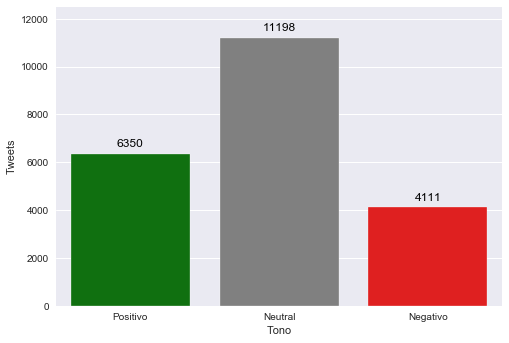

In [60]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_hc, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,12500) #To make space for the annotations
plt.show()

In [61]:
total = sum(st_df_hc['Tweets'])
positive = int(st_df_hc[st_df_hc['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_hc[st_df_hc['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_hc[st_df_hc['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 29.3%
Tweets Negativos: 19.0%
Tweets Neutrales: 51.7%


#### Quotes

In [62]:
st = db.get_sentiment_tweets(type_query='quotes', **{'partido': 'anr', 'movimiento': 'honor colorado',
                                                     'no_movimiento': 'colorado añetete'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_hc = pd.DataFrame(st_dict)

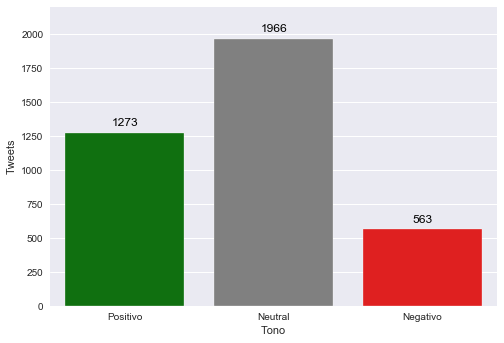

In [64]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_hc, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,2200) #To make space for the annotations
plt.show()

In [65]:
total = sum(st_df_hc['Tweets'])
positive = int(st_df_hc[st_df_hc['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_hc[st_df_hc['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_hc[st_df_hc['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 33.5%
Tweets Negativos: 14.8%
Tweets Neutrales: 51.7%


### Colorado Añeteté

In [66]:
st = db.get_sentiment_tweets(**{'partido': 'anr', 'movimiento': 'colorado añetete', 
                                'no_movimiento': 'honor colorado'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_ca = pd.DataFrame(st_dict)

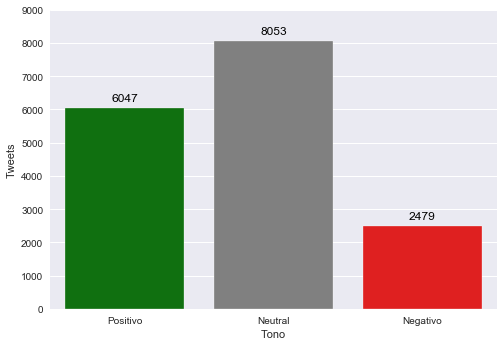

In [67]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_ca, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,9000) #To make space for the annotations
plt.show()

In [68]:
total = sum(st_df_ca['Tweets'])
positive = int(st_df_ca[st_df_ca['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_ca[st_df_ca['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_ca[st_df_ca['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 36.5%
Tweets Negativos: 15.0%
Tweets Neutrales: 48.6%


#### Tweets Originales

In [69]:
st = db.get_sentiment_tweets(type_query = 'original', **{'partido': 'anr', 'movimiento': 'colorado añetete',
                                                         'no_movimiento': 'honor colorado'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_ca = pd.DataFrame(st_dict)

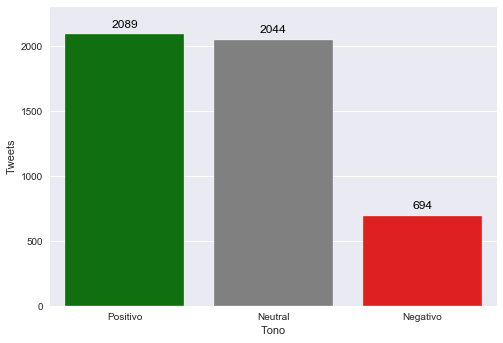

In [70]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_ca, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,2300) #To make space for the annotations
plt.show()

In [71]:
total = sum(st_df_ca['Tweets'])
positive = int(st_df_ca[st_df_ca['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_ca[st_df_ca['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_ca[st_df_ca['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 43.3%
Tweets Negativos: 14.4%
Tweets Neutrales: 42.3%


#### Replies

In [72]:
st = db.get_sentiment_tweets(type_query = 'replies', **{'partido': 'anr', 'movimiento': 'colorado añetete',
                                                        'no_movimiento': 'honor colorado'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_ca = pd.DataFrame(st_dict)

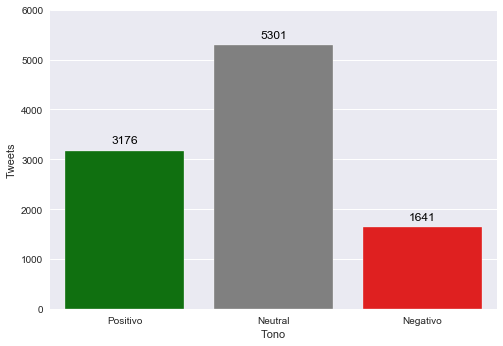

In [73]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_ca, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,6000) #To make space for the annotations
plt.show()

In [74]:
total = sum(st_df_ca['Tweets'])
positive = int(st_df_ca[st_df_ca['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_ca[st_df_ca['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_ca[st_df_ca['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 31.4%
Tweets Negativos: 16.2%
Tweets Neutrales: 52.4%


#### Quotes

In [75]:
st = db.get_sentiment_tweets(type_query = 'quotes', **{'partido': 'anr', 'movimiento': 'colorado añetete',
                                                       'no_movimiento': 'honor colorado'})
st_dict = {
    'Tono': [],
    'Tweets': []
}
for sen in st:
    if sen['sentiment'] == 'positive':
        st_dict['Tono'].append('Positivo')
    elif sen['sentiment'] == 'negative':
        st_dict['Tono'].append('Negativo')
    else:
        st_dict['Tono'].append('Neutral')
    st_dict['Tweets'].append(sen['count'])
st_df_ca = pd.DataFrame(st_dict)

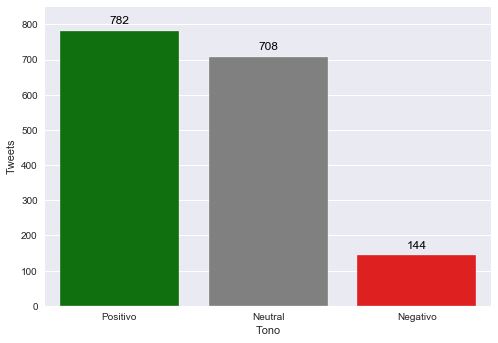

In [77]:
fig = sns.barplot(x='Tono', y='Tweets', data=st_df_ca, 
                  order=['Positivo', 'Neutral', 'Negativo'],
                  palette=['green','gray', 'red'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,850) #To make space for the annotations
plt.show()

In [78]:
total = sum(st_df_ca['Tweets'])
positive = int(st_df_ca[st_df_ca['Tono'] == 'Positivo']['Tweets'])
negative = int(st_df_ca[st_df_ca['Tono'] == 'Negativo']['Tweets'])
neutral = int(st_df_ca[st_df_ca['Tono'] == 'Neutral']['Tweets'])
print('Tweets Positivos: {0}%'.format(round(100*positive/total, 1)))
print('Tweets Negativos: {0}%'.format(round(100*negative/total, 1)))
print('Tweets Neutrales: {0}%'.format(round(100*neutral/total, 1)))

Tweets Positivos: 47.9%
Tweets Negativos: 8.8%
Tweets Neutrales: 43.3%


La distribución de tweets por tonalidad es bastante similar en ambos movimientos. Los resultados se mantienen aún dividiendo el análisis por tipo de tweet: original, reply, quote. Un aspecto interesante es que la distribución de tonalidades es ligeramente diferente para el movimiento **`Colorado Añeteté`** en cuanto a tweets originales y quotes, donde los tweets positivos sobre pasan a los neutrales.

## Distribución de Tweets por contenido

En este análisis se consideran solo tweets originales, replies, y quotes. Los retweets son descartados.

In [21]:
tot_tweets_anr_no_rt = num_original_tweets_anr + num_replies_anr + num_quotes_anr
tot_tweets_anr_no_rt

52888

### Planos

Solo texto sin links, fotos, o videos.

In [22]:
pt = db.get_plain_tweets(**{'partido': 'anr'})

In [23]:
len(pt)

45084

### Links

Tweets con links

In [24]:
lt = db.get_tweets_with_links(**{'partido': 'anr'})

In [25]:
len(lt)

1004

#### Top-10 dominios más frecuentes

In [24]:
la = LinkAnalyzer()
domains_url, domains = la.get_domains_and_freq(save_to_file=False, **{'partido': 'anr'})

In [25]:
domains_freq = pd.DataFrame(domains, columns=['Domain','Tweets'])
domains_freq[:10]

,Domain,Tweets
0,messenger,154
1,youtube,150
2,facebook,98
3,abc,82
4,ultimahora,36
5,efe,20
6,radio1000,18
7,goo,18
8,lavozdigital,17
9,instagram,14


### Fotos

Tweets con fotos

In [26]:
pht = db.get_tweets_with_photo(**{'partido': 'anr'})

In [27]:
len(pht)

6504

#### Ejemplo

In [27]:
s = ("""
<blockquote class="twitter-tweet" data-lang="en"><p lang="es" dir="ltr">Sumate al equipo ganador. ¡Votá <a href="https://twitter.com/hashtag/Lista2?src=hash&amp;ref_src=twsrc%5Etfw">#Lista2</a>! <a href="https://t.co/DOVRIcMWNX">pic.twitter.com/DOVRIcMWNX</a></p>&mdash; Santiago Peña (@SantiPenap) <a href="https://twitter.com/SantiPenap/status/936853394278330369?ref_src=twsrc%5Etfw">December 2, 2017</a></blockquote>
<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>
""")
Tweet(s)

### Videos

Tweets con video

In [28]:
vt = db.get_tweets_with_video(**{'partido': 'anr'})

In [29]:
len(vt)

296

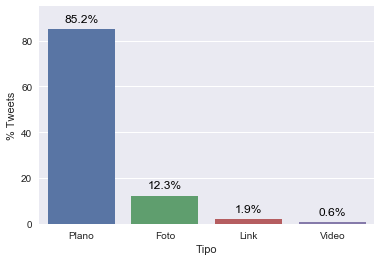

In [33]:
dis = pd.DataFrame(
    {
        'Tipo': ['Plano', 'Link', 'Foto', 'Video'],
        '% Tweets': [
            round(100*(len(pt)/tot_tweets_anr_no_rt),1),
            round(100*(len(lt)/tot_tweets_anr_no_rt),1),
            round(100*(len(pht)/tot_tweets_anr_no_rt),1),
            round(100*(len(vt)/tot_tweets_anr_no_rt),1)
        ]
    }
)
fig = sns.barplot(x='Tipo', y='% Tweets', data=dis, order=['Plano', 'Foto', 'Link', 'Video'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("{0}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,95) #To make space for the annotations
plt.show()

### Honor Colorado

In [34]:
tot_tws_hc = original_tweets_hc.count() + replies_hc.count() + quotes_hc.count()
tot_tws_hc

31161

### Planos

Solo texto sin links, fotos, o videos.

In [65]:
pt_hc = db.get_plain_tweets(**{'partido': 'anr', 'movimiento': 'honor colorado', 'no_movimiento': 'colorado añetete'})

In [66]:
print('Existen {0} tweets planos. Representan el {1}% del total de tweets originales, replies, y quotes de HC.'.
      format(len(pt_hc), round(100*(len(pt_hc)/tot_tws_hc),1)))

Existen 27072 tweets planos. Representan el 86.9% del total de tweets originales, replies, y quotes de HC.


### Links

Tweets con links

In [67]:
lt_hc = db.get_tweets_with_links(**{'partido': 'anr', 'movimiento': 'honor colorado', 
                                    'no_movimiento': 'colorado añetete'})

In [68]:
print('Existen {0} tweets con links. Representan el {1}% del total de tweets originales, replies, y quotes de HC.'.
      format(len(lt_hc), round(100*(len(lt_hc)/tot_tws_hc),1)))

Existen 368 tweets con links. Representan el 1.2% del total de tweets originales, replies, y quotes de HC.


#### Top-10 dominios más frecuentes

In [97]:
domains_hc = db.get_domains_of_tweets_with_links(**{'partido': 'anr', 'movimiento': 'honor colorado',
                                                    'no_movimiento': 'colorado añetete'})

In [107]:
domains_freq = pd.DataFrame(domains_hc, columns=['count','domain'])
domains_freq.head(10)

,count,domain
0,130,youtube
1,48,abc
2,46,facebook
3,15,efe
4,14,ultimahora
5,8,santipresidente
6,7,lavozdigital
7,7,twitter
8,6,rdn
9,5,paraguay


#### Links de Periódicos

In [99]:
diarios_links = defaultdict(int)
for tweet in lt_hc:
    if 'entities' in  tweet['tweet_obj'].keys():
        for url in tweet['tweet_obj']['entities']['urls']:
            if 'abc' in url['expanded_url'] or 'ultimahora' in url['expanded_url']:
                diarios_links[url['expanded_url']] += 1

In [100]:
diarios_links

defaultdict(int,
            {'http://abc.com.py/1655658.html': 1,
             'http://abc.com.py/1656563.html': 1,
             'http://abc.com.py/1656619.html': 1,
             'http://abc.com.py/1658093.html': 1,
             'http://abc.com.py/1658251.html': 1,
             'http://abc.com.py/1661062.html': 1,
             'http://abc.com.py/1661283.html': 1,
             'http://abc.com.py/1662899.html': 1,
             'http://abc.com.py/1665825.html': 1,
             'http://m.abc.com.py/730am/a-la-gran-730/se-pudre-la-justicia-estos-son-los-audios-caso-por-caso-1658242.html': 2,
             'http://m.abc.com.py/edicion-impresa/economia/detectan-irregularidades-en-gestion-de-pena-en-mh-1658093.html': 2,
             'http://m.abc.com.py/edicion-impresa/economia/mas-seccionaleros-en-itaipu-1633721.html': 1,
             'http://m.abc.com.py/edicion-impresa/economia/saltan-indicios-de-que-se-rifo-dinero-para-educacion-durante-la-era-pena-1658079.html': 1,
             'http://m.

### Fotos

Tweets con fotos

In [72]:
pht_hc = db.get_tweets_with_photo(**{'partido': 'anr', 'movimiento': 'honor colorado', 'no_movimiento': 'colorado añetete'})

In [73]:
print('Existen {0} tweets con fotos. Representan el {1}% del total de tweets originales, replies, y quotes de HC.'.
      format(len(pht_hc), round(100*(len(pht_hc)/tot_tws_hc),1)))

Existen 3645 tweets con fotos. Representan el 11.7% del total de tweets originales, replies, y quotes de HC.


### Videos

Tweets con video

In [74]:
vt_hc = db.get_tweets_with_video(**{'partido': 'anr', 'movimiento': 'honor colorado', 'no_movimiento': 'colorado añetete'})

In [75]:
print('Existen {0} tweets videos. Representan el {1}% del total de tweets originales, replies, y quotes de HC.'.
      format(len(vt_hc), round(100*(len(vt_hc)/tot_tws_hc),1)))

Existen 76 tweets videos. Representan el 0.2% del total de tweets originales, replies, y quotes de HC.


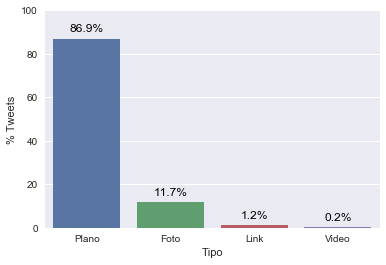

In [76]:
dis_hc = pd.DataFrame(
    {
        'Tipo': ['Plano', 'Link', 'Foto', 'Video'],
        '% Tweets': [
            round(100*(len(pt_hc)/tot_tws_hc),1),
            round(100*(len(lt_hc)/tot_tws_hc),1),
            round(100*(len(pht_hc)/tot_tws_hc),1),
            round(100*(len(vt_hc)/tot_tws_hc),1)
        ],
        'Movimiento': ['Honor Colorado', 'Honor Colorado', 'Honor Colorado', 'Honor Colorado']
    }
)
fig = sns.barplot(x='Tipo', y='% Tweets', data=dis_hc, order=['Plano', 'Foto', 'Link', 'Video'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("{0}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,100) #To make space for the annotations
plt.show()

### Colorado Añeteté

In [44]:
tot_tws_ca = original_tweets_ca.count() + replies_ca.count() + quotes_ca.count()

### Planos

Solo texto sin links, fotos, o videos.

In [77]:
pt_ca = db.get_plain_tweets(**{'partido': 'anr', 'movimiento': 'colorado añetete', 'no_movimiento': 'honor colorado'})

In [78]:
print('Existen {0} tweets planos. Representan el {1}% del total de tweets originales, replies, y quotes de CA.'.
      format(len(pt_ca), round(100*(len(pt_ca)/tot_tws_ca),1)))

Existen 13740 tweets planos. Representan el 82.9% del total de tweets originales, replies, y quotes de CA.


### Links

Tweets con links

In [79]:
lt_ca = db.get_tweets_with_links(**{'partido': 'anr', 'movimiento': 'colorado añetete', 
                                    'no_movimiento': 'honor colorado'})

In [80]:
print('Existen {0} tweets con links. Representan el {1}% del total de tweets originales, replies, y quotes de CA.'.
      format(len(lt_ca), round(100*(len(lt_ca)/tot_tws_ca),1)))

Existen 482 tweets con links. Representan el 2.9% del total de tweets originales, replies, y quotes de CA.


#### Top-10 dominios más frecuentes

In [101]:
domains_ca = db.get_domains_of_tweets_with_links(**{'partido': 'anr', 'no_movimiento': 'honor colorado',
                                                    'movimiento': 'colorado añetete'})

In [108]:
domains_freq = pd.DataFrame(domains_ca, columns=['count','domain'])
domains_freq.head(10)

,count,domain
0,154,messenger
1,43,facebook
2,24,abc
3,20,ultimahora
4,18,radio1000
5,17,youtube
6,11,instagram
7,7,nanduti
8,5,goo
9,5,lavozdigital


In [103]:
diarios_links_ca = defaultdict(int)
for tweet in lt_ca:
    if 'entities' in  tweet['tweet_obj'].keys():
        for url in tweet['tweet_obj']['entities']['urls']:
            if 'abc' in url['expanded_url'] or 'ultimahora' in url['expanded_url']:
                diarios_links_ca[url['expanded_url']] += 1

In [104]:
diarios_links_ca

defaultdict(int,
            {'http://abc.com.py/1657566.html': 1,
             'http://abc.com.py/1661262.html': 5,
             'http://abc.com.py/1661322.html': 1,
             'http://abc.com.py/tv/': 1,
             'http://m.abc.com.py/edicion-impresa/politica/acusan-a-grupo-ligado-a-gonzalez-daher-de-robar-45000-hectareas-en-el-chaco-1665667.html': 1,
             'http://m.abc.com.py/edicion-impresa/politica/anetete-arrasa-en-quilmes-1664823.html': 1,
             'http://m.abc.com.py/edicion-impresa/politica/disidencia-gana-la-interna-complementaria-en-lambare-1664822.html': 1,
             'http://m.abc.com.py/edicion-impresa/politica/el-director-de-yacyreta-le-desafia-a-la-ciudadania-y-da-mas-poderes-a-canillas-1666305.html': 1,
             'http://m.abc.com.py/edicion-impresa/politica/marito-pide-en-santani-la-unidad-para-las-generales-1664384.html': 1,
             'http://m.abc.com.py/edicion-impresa/politica/marito-quiere-otro-35-anos-de-stroessner-en-el-poder-855620.ht

### Fotos

Tweets con fotos

In [81]:
pht_ca = db.get_tweets_with_photo(**{'partido': 'anr', 'movimiento': 'colorado añetete', 
                                     'no_movimiento': 'honor colorado'})

In [82]:
print('Existen {0} tweets con fotos. Representan el {1}% del total de tweets originales, replies, y quotes de CA.'.
      format(len(pht_ca), round(100*(len(pht_ca)/tot_tws_ca),1)))

Existen 2140 tweets con fotos. Representan el 12.9% del total de tweets originales, replies, y quotes de CA.


### Videos

Tweets con video

In [83]:
vt_ca = db.get_tweets_with_video(**{'partido': 'anr', 'movimiento': 'colorado añetete', 
                                    'no_movimiento': 'honor colorado'})

In [84]:
print('Existen {0} tweets con video. Representan el {1}% del total de tweets originales, replies, y quotes de CA.'.
      format(len(vt_ca), round(100*(len(vt_ca)/tot_tws_ca),1)))

Existen 217 tweets con video. Representan el 1.3% del total de tweets originales, replies, y quotes de CA.


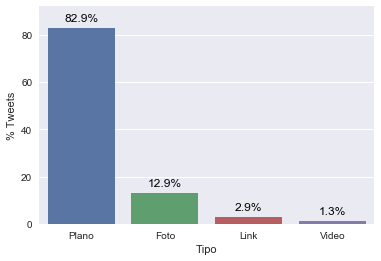

In [85]:
dis_ca = pd.DataFrame(
    {
        'Tipo': ['Plano', 'Link', 'Foto', 'Video'],
        '% Tweets': [
            round(100*(len(pt_ca)/tot_tws_ca),1),
            round(100*(len(lt_ca)/tot_tws_ca),1),
            round(100*(len(pht_ca)/tot_tws_ca),1),
            round(100*(len(vt_ca)/tot_tws_ca),1)
        ],
        'Movimiento': ['Colorado Añeteté', 'Colorado Añeteté', 'Colorado Añeteté', 'Colorado Añeteté']
    }
)
fig = sns.barplot(x='Tipo', y='% Tweets', data=dis, order=['Plano', 'Foto', 'Link', 'Video'])
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("{0}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,92) #To make space for the annotations
plt.show()

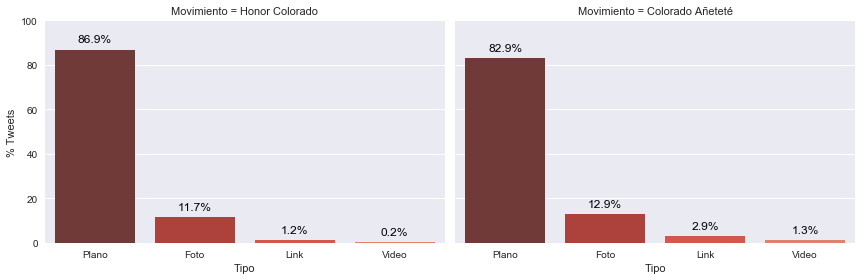

In [91]:
dis_type = dis_hc
dis_type = dis_type.append(dis_ca)
plt.figure(figsize=(20,12))
g = sns.FacetGrid(dis_type, col="Movimiento", height=4, aspect=1.5)
g.map(sns.barplot, 'Tipo', '% Tweets', order=['Plano', 'Foto', 'Link', 'Video'], palette="Reds_d")
#annotate axis = seaborn axis
for ax in g.axes.ravel():
    for p in ax.patches:
        ax.annotate("{0}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                     textcoords='offset points')
g.set(ylim=(0, 100))
plt.show()
g.savefig("dis_type_content_both_movements.png", dpi=200, quality=95)

## Hashtags más populares

Lista de hashtag más comunes utilizados en tweets relacionados a los movimientos Honor Colorado y Colorado Añeteté.

### Top-5 hashtags relacionado a Honor Colorado

In [53]:
additional_args = {'include_candidate':False, 'candidate_handler':'SantiPenap'}
hashtags_hc = db.get_hashtags_by_movement('honor colorado', **additional_args)
hashtags_populares_hc = []
sum_total = 0
for i in range(5):
    hashtag = hashtags_hc[i]
    sum_total += hashtag['count']
    hashtag_dict = {'1. Hashtag': '#' + hashtag['hashtag'], '2. Cantidad de Tweets': hashtag['count']}
    hashtags_populares_hc.append(hashtag_dict)
pd.DataFrame(hashtags_populares_hc)

,1. Hashtag,2. Cantidad de Tweets
0,#Lista2,3184
1,#SantiPresidente,3167
2,#SigamosConversando,1294
3,#HonorColorado,979
4,#ParaguayElige,759


### Top-5 hashtags relacionados a Colorado Añeteté

In [54]:
additional_args = {'include_candidate':False, 'candidate_handler':'MaritoAbdo'}
hashtags_ca = db.get_hashtags_by_movement('colorado añetete', **additional_args)
hashtags_populares_ca = []
for i in range(5):
    hashtag = hashtags_ca[i]
    hashtag_dict = {'1. Hashtag': '#' + hashtag['hashtag'], '2. Cantidad de Tweets': hashtag['count']}
    hashtags_populares_ca.append(hashtag_dict)
pd.DataFrame(hashtags_populares_ca)

,1. Hashtag,2. Cantidad de Tweets
0,#ParaguayDeLaGente,8421
1,#MaritoImparable,1404
2,#MaritoDeLaGente,1402
3,#ParaguayElige,645
4,#MaritoPresidente,560


## Cantidad de tuiteros por movimiento

Análisis de la cantidad de perfiles que publicaron tweets conteniendo los hashtags de los movimientos. Los conjuntos de perfiles no son mutuamente excluyente. En otros palabras, pueden existir perfiles que hayan realizado publicado tweets usando hashtags vinculados a ambos movimientos. 

### Honor Colorado

In [35]:
users_hc = dbu.get_users_and_activity(**{'partido': 'anr', 'movimiento': 'honor colorado'})

In [34]:
print('{0} usuarios tuitearon utilizando hashtags vinculados al movimiento Honor Colorado'.
      format(len(users_hc)))

1301 usuarios tuitearon utilizando hashtags vinculados al movimiento Honor Colorado


#### Top-10 más activos con sus principales características y actividades

In [36]:
tuiteros_hc = []
for user in users_hc:
    tuitero_hc = {'1.Usuario': user['screen_name'], 
                  '3.Tweets': user['tweets'],
                  '4.Originales': user['original_tweets'],
                  '5.Retweets': user['rts'],
                  '6.Quotes': user['qts'],
                  '7.Replies': user['rps'],
                  '8.Followers': user['followers'],
                  '9.Friends': user['friends'],
                  '10. PBB': user['pbb']}
    tuiteros_hc.append(tuitero_hc)
df_tuiteros_hc = pd.DataFrame(tuiteros_hc)
df_tuiteros_hc[0:10]

,1.Usuario,10. PBB,3.Tweets,4.Originales,5.Retweets,6.Quotes,7.Replies,8.Followers,9.Friends
0,CESARSANCHEZ553,1.191947,952,0,754,0,198,17,132
1,delgapy2016,0.812437,529,0,485,0,44,79,461
2,ArturoO22734057,0.736119,516,1,510,0,5,192,825
3,machaparro48,0.392326,377,0,240,0,137,928,886
4,AngelicaZunilda,0.300211,362,0,170,0,192,124,50
5,UNO650AM,0.204979,343,241,14,1,87,105675,682
6,BCaceres80,0.599166,331,0,285,0,46,1323,3931
7,guidoschultz73,0.490592,329,0,274,0,55,175,259
8,LaUnionAM800,0.000000,320,299,21,0,0,42555,280
9,Mariade84654356,0.897414,266,0,266,0,0,12,80


### Colorado Añeteté

In [37]:
users_ca = dbu.get_users_and_activity(**{'partido': 'anr', 'movimiento': 'colorado añetete'})

In [38]:
print('{0} usuarios tuitearon utilizando hashtags vinculados al movimiento Colorado Aneteté'.
      format(len(users_ca)))

2215 usuarios tuitearon utilizando hashtags vinculados al movimiento Colorado Aneteté


#### Top-10 más activos y sus actividades

In [39]:
tuiteros_ca = []
for user_ca in users_ca:
    tuitero_ca = {'1.Usuario': user_ca['screen_name'], 
                  '3.Tweets': user_ca['tweets'],
                  '4.Originales': user_ca['original_tweets'],
                  '5.Retweets': user_ca['rts'],
                  '6.Quotes': user_ca['qts'],
                  '7.Replies': user_ca['rps'],
                  '8.Followers': user_ca['friends'],
                  '9.Friends': user_ca['followers'],
                  '10. PBB': user_ca['pbb']}
    tuiteros_ca.append(tuitero_ca)
df_tuiteros_ca = pd.DataFrame(tuiteros_ca)
df_tuiteros_ca[0:10]

,1.Usuario,10. PBB,3.Tweets,4.Originales,5.Retweets,6.Quotes,7.Replies,8.Followers,9.Friends
0,Norabeli,0.385551,941,1,734,2,204,930,1387
1,Paraguaynosune,0.424198,856,0,856,0,0,174,520
2,Beatriz20D,0.744348,854,0,743,2,109,739,210
3,CesarSanchez636,0.851941,802,0,646,0,156,651,155
4,Solmelga,0.294215,540,138,330,1,71,4790,5323
5,SemideiOmar,0.263063,527,8,3,0,516,277,419
6,felixugarte,0.304890,373,0,367,0,6,369,499
7,LaJusticierra,0.322528,344,2,258,0,84,1262,3344
8,AlamVera2,0.339423,286,2,62,0,222,121,115
9,MaritoAbdo,0.000000,270,228,42,0,0,501,101326


### Neutros

In [40]:
users_neutros = dbu.get_users_and_activity(**{'partido': 'anr', 'movimiento': None})

In [41]:
print('{0} usuarios tuitearon sobre las internas de la ANR pero no vinculados al algún movimiento en particular'.
      format(len(users_neutros)))

20104 usuarios tuitearon sobre las internas de la ANR pero no vinculados al algún movimiento en particular


In [42]:
tuiteros_nu = []
for user_nu in users_neutros:
    tuitero_nu = {'1.Usuario': user_nu['screen_name'], 
                  '3.Tweets': user_nu['tweets'],
                  '4.Originales': user_nu['original_tweets'],
                  '5.Retweets': user_nu['rts'],
                  '6.Quotes': user_nu['qts'],
                  '7.Replies': user_nu['rps'],
                  '8.Followers': user_nu['friends'],
                  '9.Friends': user_nu['followers'],
                  '10. PBB': user_nu['pbb']}
    tuiteros_nu.append(tuitero_nu)
df_tuiteros_nu = pd.DataFrame(tuiteros_nu)
df_tuiteros_nu.head()

,1.Usuario,10. PBB,3.Tweets,4.Originales,5.Retweets,6.Quotes,7.Replies,8.Followers,9.Friends
0,Michelec1954,0.574453,707,0,0,575,132,1484,708
1,gladysgulino,0.348731,548,0,548,0,0,93,471
2,Radio970AM,0.216336,535,96,11,5,423,875,211891
3,JavierSanchezPy,0.128002,434,237,136,4,57,1373,11151
4,1000_am,0.132465,421,148,78,1,194,368,93115


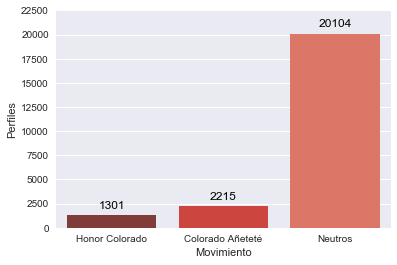

In [44]:
tuiteros_por_movimiento = pd.DataFrame({
    'Movimiento': ['Honor Colorado', 'Colorado Añeteté', 'Neutros'],
    'Perfiles': [len(users_hc), len(users_ca), len(users_neutros)]
}, index=['hc', 'ca', 'ne'])
fig = sns.barplot(x='Movimiento', y='Perfiles', data=tuiteros_por_movimiento, palette="Reds_d")
for p in fig.patches:
    fig.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,22500) #To make space for the annotations
plt.show()

La cantidad de perfiles que publicaron tweets utilizando hashtags vinculados al movimiento **`Honor Colorado`** (1.301, 5% del total de perfiles vinculados a la ANR) es inferior al de **`Colorado Añeteté`** (2.215, 9% del total ANR). **Por cada tuitero de `Honor Colorado` existen casi 2 tuiteros de `Colorado Añeteté`**. La diferencia en la cantidad de tuiteros es contraria a la cantidad de tweets de cada movimienton ya que **`Honor Colorado`** tiene casi el doble de tweets que **`Colorado Añeteté`**. Un aspecto a notar aquí es que existen 20.104 perfiles que publicaron tweets relacionados a las internas del partido colorado pero a ningún movimiento en particular.

Otro aspecto destacable es el tipo de actividad que realizan tanto los tuiteros. Comparando las actividades de los perfiles más activos en ambos movimiento se nota que en la mayoría de los casos, **los tuiteros más activos no realizan publicaciones propias** sino más bien se ocupan de realizar retweets. En otras palabras, la principal actividad de estos usuarios es amplificar y promocionar información relacionada a sus intereses. **Este comportamiento es típico de bots y cuentas falsas**.

## Análisis de bots

In [10]:
# Array of heuristic weights
heuristic_weights = np.array([4, 4, 2.5, 2.5, 2, 1.5, 1.5, 1.5, 1.5, 1, 3, 2, 2, 2.5, 2, 3])
sum_weights = sum(heuristic_weights)

# Arrays of heuristic weights dependeing on whether the account exists or not. If
# the account doesn't exist, two heuristics are not applied, i.e., retweet_timeline
# and reply_timeline. The number 9 in the array was calculated after computing the
# histogram of the heuristic ff_ratio and seeing that most of the accounts have
# a ratio between 0 and 8, so we consider that a potential bot have a ratio larger than that
conservative_existing_bot = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 0, 1])
conservative_no_existing_bot = np.array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1])

# Sum of the cartesian product between the weights and the values of the potential bots
raw_conservative_existing_bot = sum(heuristic_weights*conservative_existing_bot)
raw_conservative_no_existing_bot = sum(heuristic_weights*conservative_no_existing_bot)

# The pbb score is calculated by dividing the sum of the cartesian product and the sum
# of th weights. For the non existing bots, we substracted the weights of the 
# heuristics that are not applied (4 and 2.5)
pbb_conservative_existing_bot = raw_conservative_existing_bot/sum_weights
pbb_conservative_no_existing_bot = raw_conservative_no_existing_bot/(sum_weights-6.5)

thresholds = {
    'existing' : pbb_conservative_existing_bot,
    'no_existing' : pbb_conservative_no_existing_bot,
}
thresholds

{'existing': 1.6027397260273972, 'no_existing': 1.8}

In [86]:
l_all_users = [{'screen_name': user['screen_name'], 'pbb': user['bot_analysis']['pbb'], 
                'party': user['party'], 'movement': user['movement'], 'exists': user['exists'],
                '3.Tweets': user['tweets'],
                '4.Originales': user['original_tweets'],
                '5.Retweets': user['rts'],
                '6.Quotes': user['qts'],
                '7.Replies': user['rps'],} 
               for user in unique_tw_authors]
all_users_df = pd.DataFrame(l_all_users)

In [87]:
all_users_df.head()

,3.Tweets,4.Originales,5.Retweets,6.Quotes,7.Replies,exists,movement,party,pbb,screen_name
0,952,0,754,0,198,0,honor colorado,anr,1.191947,CESARSANCHEZ553
1,941,1,734,2,204,1,colorado añetete,anr,0.385551,Norabeli
2,856,0,856,0,0,1,colorado añetete,anr,0.424198,Paraguaynosune
3,854,0,743,2,109,1,colorado añetete,anr,0.744348,Beatriz20D
4,802,0,646,0,156,0,colorado añetete,anr,0.851941,CesarSanchez636


### Los bots de HC

In [88]:
cond1 = all_users_df['movement']=='honor colorado'
cond2 = all_users_df['exists']==1
cond3 = all_users_df['pbb']>thresholds['existing']
cond4 = all_users_df['exists']==0
cond5 = all_users_df['pbb']>thresholds['no_existing']
bots_hc = all_users_df[cond1 & cond2 & cond3]
bots_hc.append(all_users_df[cond1 & cond4 & cond5])
bots_hc.shape

(175, 10)

In [89]:
bots_hc.head()

,3.Tweets,4.Originales,5.Retweets,6.Quotes,7.Replies,exists,movement,party,pbb,screen_name
51,208,0,207,0,1,1,honor colorado,anr,6.761414,Solomiopinionpy
56,192,0,192,0,0,1,honor colorado,anr,1.855204,RaquelTrinida19
68,175,0,172,0,3,1,honor colorado,anr,2.944234,PamelaR61647190
69,175,0,173,0,2,1,honor colorado,anr,6.325244,RobertPereiraZ1
77,162,0,158,0,4,1,honor colorado,anr,3.200243,AldoAbelRoman


In [90]:
tot_bots_hc = bots_hc.shape[0]
tot_perf_hc = df_tuiteros_hc.shape[0]
per_bots_hc = round(100*tot_bots_hc/tot_perf_hc,0)
print(tot_perf_hc)
print('Existen {0} bots en el movimiento HC, {1}% del total'.format(tot_bots_hc, per_bots_hc))

1301
Existen 175 bots en el movimiento HC, 13.0% del total


#### Características de los bots HC

In [91]:
ch_bots_hc = {
    '1.Total Tweets': sum(bots_hc['3.Tweets']),
    '2.Tweets Originales': sum(bots_hc['4.Originales']),
    '3.Retweets': sum(bots_hc['5.Retweets']),
    '4.Quotes': sum(bots_hc['6.Quotes']),
    '5.Replies': sum(bots_hc['7.Replies'])
}
pd.DataFrame(ch_bots_hc, index=[''])

,1.Total Tweets,2.Tweets Originales,3.Retweets,4.Quotes,5.Replies
,5589,120,4540,4,925


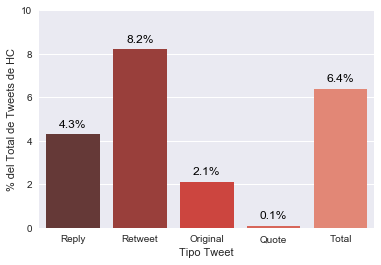

In [94]:
bot_per_of_total = pd.DataFrame(
    {
        'Tipo Tweet': ['Original', 'Retweet', 'Quote', 'Reply', 'Total'],
        '% del Total de Tweets de HC': [
            round(100*(sum(bots_hc['4.Originales'])/num_original_tweets_hc),1),
            round(100*(sum(bots_hc['5.Retweets'])/num_retweets_hc),1),
            round(100*(sum(bots_hc['6.Quotes'])/num_quotes_hc),1),
            round(100*(sum(bots_hc['7.Replies'])/num_replies_hc),1),
            round(100*(sum(bots_hc['3.Tweets'])/tweets_hc.count()),1)
        ]
    }
)
fig = sns.barplot(x='Tipo Tweet', y='% del Total de Tweets de HC', 
                  data=bot_per_of_total, 
                  order=['Reply', 'Retweet', 'Original', 'Quote', 'Total'],
                  palette="Reds_d")
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("{0}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,10) #To make space for the annotations
plt.show()

#### Análisis de los reply de los bots

In [95]:
replies_bots_hc = db.search({'tweet_obj.retweeted_status': {'$exists': 0},
                             'tweet_obj.in_reply_to_status_id_str': {'$ne': None},
                             'tweet_obj.is_quote_status': False,
                             'tweet_obj.user.screen_name': {'$in': list(bots_hc['screen_name'])}})

In [96]:
total_replies_bots_hc = replies_bots_hc.count()
pos_replies, neu_replies, neg_replies = 0, 0, 0
for reply in replies_bots_hc:
    if reply['sentimiento']['tono'] == 'negative':
        neg_replies += 1
    if reply['sentimiento']['tono'] == 'neutral':
        neu_replies += 1
    if reply['sentimiento']['tono'] == 'positive':
        pos_replies += 1
print('Total replies: {0}'.format(total_replies_bots_hc))
print('Positive replies: {0}'.format(pos_replies))
print('Neutral replies: {0}'.format(neu_replies))
print('Negative replies: {0}'.format(neg_replies))

Total replies: 907
Positive replies: 291
Neutral replies: 505
Negative replies: 111


### Los bots Añeteté

In [98]:
cond1 = all_users_df['movement']=='colorado añetete'
cond2 = all_users_df['exists']==1
cond3 = all_users_df['pbb']>thresholds['existing']
cond4 = all_users_df['exists']==0
cond5 = all_users_df['pbb']>thresholds['no_existing']
bots_ca = all_users_df[cond1 & cond2 & cond3]
bots_ca.append(all_users_df[cond1 & cond4 & cond5])
bots_ca.shape

(162, 10)

In [99]:
bots_ca.head()

,3.Tweets,4.Originales,5.Retweets,6.Quotes,7.Replies,exists,movement,party,pbb,screen_name
250,84,21,61,0,2,1,colorado añetete,anr,1.972142,mercy_rael_
308,73,0,72,1,0,1,colorado añetete,anr,3.027577,MathiasMMartin
340,67,5,62,0,0,1,colorado añetete,anr,1.767486,OsmarCMunoz
363,64,1,21,0,42,1,colorado añetete,anr,3.773519,Irma59952042
488,51,15,35,0,1,1,colorado añetete,anr,4.889428,Francis_Gonzal_


In [100]:
tot_bots_ca = bots_ca.shape[0]
tot_perf_ca = df_tuiteros_ca.shape[0]
print(tot_perf_ca)
per_bots_ca = round(100*tot_bots_ca/tot_perf_ca,0)
print('Existen {0} bots en el movimiento Colorado Añetete, {1}% del total'.format(tot_bots_ca, per_bots_ca))

2215
Existen 162 bots en el movimiento Colorado Añetete, 7.0% del total


#### Características bots Añeteté

In [101]:
ch_bots_ca = {
    '1.Total Tweets': sum(bots_ca['3.Tweets']),
    '2.Tweets Originales': sum(bots_ca['4.Originales']),
    '3.Retweets': sum(bots_ca['5.Retweets']),
    '4.Quotes': sum(bots_ca['6.Quotes']),
    '5.Replies': sum(bots_ca['7.Replies'])
}
pd.DataFrame(ch_bots_ca, index=[''])

,1.Total Tweets,2.Tweets Originales,3.Retweets,4.Quotes,5.Replies
,1732,183,1312,8,229


#### Análisis de los reply de los bots

In [103]:
replies_bots_ca = db.search({'tweet_obj.retweeted_status': {'$exists': 0},
                             'tweet_obj.in_reply_to_status_id_str': {'$ne': None},
                             'tweet_obj.is_quote_status': False,
                             'tweet_obj.user.screen_name': {'$in': list(bots_ca['screen_name'])}})

In [104]:
total_replies_bots_ca = replies_bots_ca.count()
pos_replies, neu_replies, neg_replies = 0, 0, 0
for reply in replies_bots_ca:
    if reply['sentimiento']['tono'] == 'negative':
        neg_replies += 1
    if reply['sentimiento']['tono'] == 'neutral':
        neu_replies += 1
    if reply['sentimiento']['tono'] == 'positive':
        pos_replies += 1
print('Total replies: {0}'.format(total_replies_bots_ca))
print('Positive replies: {0}'.format(pos_replies))
print('Neutral replies: {0}'.format(neu_replies))
print('Negative replies: {0}'.format(neg_replies))

Total replies: 223
Positive replies: 69
Neutral replies: 128
Negative replies: 26


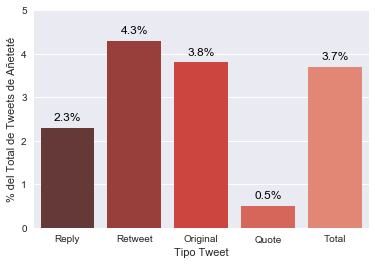

In [106]:
bot_per_of_total = pd.DataFrame(
    {
        'Tipo Tweet': ['Original', 'Retweet', 'Quote', 'Reply', 'Total'],
        '% del Total de Tweets de Añeteté': [
            round(100*(sum(bots_ca['4.Originales'])/num_original_tweets_ca),1),
            round(100*(sum(bots_ca['5.Retweets'])/num_retweets_ca),1),
            round(100*(sum(bots_ca['6.Quotes'])/num_quotes_ca),1),
            round(100*(sum(bots_ca['7.Replies'])/num_replies_ca),1),
            round(100*(sum(bots_ca['3.Tweets'])/tweets_ca.count()),1)
        ]
    }
)
fig = sns.barplot(x='Tipo Tweet', y='% del Total de Tweets de Añeteté', 
                  data=bot_per_of_total, 
                  order=['Reply', 'Retweet', 'Original', 'Quote', 'Total'],
                  palette="Reds_d")
ax=fig
#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("{0}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,5) #To make space for the annotations
plt.show()

### Los bots neutrales

In [109]:
cond0 = all_users_df['movement']!='colorado añetete'
cond1 = all_users_df['movement']!='honor colorado'
cond2 = all_users_df['exists']==1
cond3 = all_users_df['pbb']>thresholds['existing']
cond4 = all_users_df['exists']==0
cond5 = all_users_df['pbb']>thresholds['no_existing']
bots_nu = all_users_df[cond0 & cond1 & cond2 & cond3]
bots_nu.append(all_users_df[cond0 & cond1 & cond4 & cond5])
bots_nu.shape

(1596, 10)

In [110]:
bots_nu.head()

,3.Tweets,4.Originales,5.Retweets,6.Quotes,7.Replies,exists,movement,party,pbb,screen_name
315,71,0,0,0,71,1,None,anr,2.441203,MariaelenaSugat
391,60,1,6,0,53,1,None,anr,1.724268,2LegiTwoQuit
413,58,0,2,0,56,1,None,anr,2.900121,Armanbarret
623,42,0,0,0,42,1,None,anr,3.444049,LuisaRecalde1
703,37,0,28,0,9,1,None,anr,3.565401,BrunoValdez1998


In [111]:
tot_bots_nu = bots_nu.shape[0]
tot_perf_nu = df_tuiteros_nu.shape[0]
print(tot_perf_nu)
per_bots_nu = round(100*tot_bots_nu/tot_perf_nu,0)
print('Existen {0} bots neutrales, {1}% del total'.format(tot_bots_nu, per_bots_nu))

20104
Existen 1596 bots neutrales, 8.0% del total


#### Características bots neutrales

In [112]:
ch_bots_nu = {
    '1.Total Tweets': sum(bots_nu['3.Tweets']),
    '2.Tweets Originales': sum(bots_nu['4.Originales']),
    '3.Retweets': sum(bots_nu['5.Retweets']),
    '4.Quotes': sum(bots_nu['6.Quotes']),
    '5.Replies': sum(bots_nu['7.Replies'])
}
pd.DataFrame(ch_bots_nu, index=[''])

,1.Total Tweets,2.Tweets Originales,3.Retweets,4.Quotes,5.Replies
,4437,60,1306,8,3063


In [113]:
bot_per_of_total = pd.DataFrame(
    {
        'Tipo Tweet': ['Original', 'Retweet', 'Quote', 'Reply', 'Total', 
                       'Original', 'Retweet', 'Quote', 'Reply', 'Total'],
        '% del Total de Tweets del Movimiento': [
            round(100*(sum(bots_ca['4.Originales'])/num_original_tweets_ca),1),
            round(100*(sum(bots_ca['5.Retweets'])/num_retweets_ca),1),
            round(100*(sum(bots_ca['6.Quotes'])/num_quotes_ca),1),
            round(100*(sum(bots_ca['7.Replies'])/num_replies_ca),1),
            round(100*(sum(bots_ca['3.Tweets'])/tweets_ca.count()),1),
            round(100*(sum(bots_hc['4.Originales'])/num_original_tweets_hc),1),
            round(100*(sum(bots_hc['5.Retweets'])/num_retweets_hc),1),
            round(100*(sum(bots_hc['6.Quotes'])/num_quotes_hc),1),
            round(100*(sum(bots_hc['7.Replies'])/num_replies_hc),1),
            round(100*(sum(bots_hc['3.Tweets'])/tweets_hc.count()),1)
        ],
        'Movimiento': ['Colorado Añeteté', 'Colorado Añeteté', 'Colorado Añeteté', 'Colorado Añeteté', 
                       'Colorado Añeteté',
                       'Honor Colorado', 'Honor Colorado', 'Honor Colorado', 'Honor Colorado', 'Honor Colorado']
    }
)

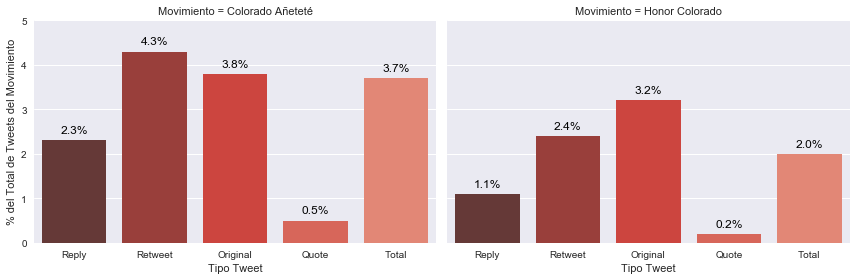

In [117]:
plt.figure(figsize=(20,12))
g = sns.FacetGrid(bot_per_of_total, col="Movimiento", height=4, aspect=1.5)
g.map(sns.barplot, 'Tipo Tweet', '% del Total de Tweets del Movimiento', 
      order=['Reply', 'Retweet', 'Original', 'Quote', 'Total'],
      palette="Reds_d")
#annotate axis = seaborn axis
for ax in g.axes.ravel():
    for p in ax.patches:
        ax.annotate("{0}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                     textcoords='offset points')
g.set(ylim=(0, 5))
plt.show()
g.savefig("bots_por_movimiento.png", dpi=200, quality=95)

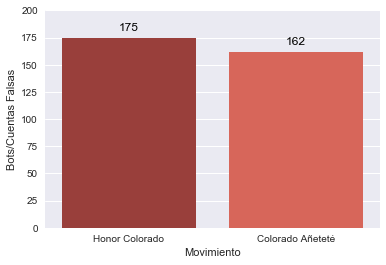

In [120]:
bots_ambos = pd.DataFrame(
    {
        'Movimiento': ['Colorado Añeteté', 'Honor Colorado'],
        'Bots/Cuentas Falsas': [tot_bots_ca, tot_bots_hc]
    }
)
fig = sns.barplot(x='Movimiento', y='Bots/Cuentas Falsas', data=bots_ambos, palette="Reds_d",
                  order=['Honor Colorado', 'Colorado Añeteté'])
for p in fig.patches:
    fig.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')
_ = fig.set_ylim(0,200) #To make space for the annotations
plt.show()

## Red de interacciones entre perfiles

Como parte del estudio realizamos un análisis sobre la red de perfiles que publicaron tweets utilizando hashtags relacionados a la interna del partido colorado. El análisis lo centramos en las interacciones entre los perfiles, no en las relaciones entre ellos (seguidores, seguidos). Consideramos que A tuvo una interacción con B si i) publicó un tweet mencionando a B; ii) retuiteo un tweet publicado por B; iii) citó (quote) un tweet publicado por B; iv) respondió un tweet publicado por B.

Al generar la **red de interacciones** encontramos que de la misma forman parte **24.176 perfiles** que se comunicaron entre si 85.994 veces en el período de Noviembre 2017 a Enero 2018, el promedio de interacciones de un perfil en la red es 3,56. La cantidad de perfiles en la red supera en 380 el total de perfiles relacionados a la ANR. Esto se debe principalmente a que la red también incluye perfiles vinculados a otros partidos que realizaron interacciones con los de la ANR.

El perfil `CESARSANCHEZ553` fue el que más interacciones generó (463), seguido por `CesarSanchez636` (378), y `Norabeli` (354), todos vinculados principalmente al movimiento `Honor Colorado`. `Santula` (4.661), `MaritoAbdo` (4.636), y `SantiPenap` (4.532) fueron los perfiles que más interacciones recibieron, esto es menciones, retweets, replies, quotes. Es interesante notar el rol tan preponderante del periodista Santiago González (Santula). En el último mes de campaña Santula atrajo inclusive más interacciones que los mismos candidatos a la presidencia.

![Red Interacciones](../../sna/img/internas-anr-ired.png)

### Honor Colorado

![Red Interacciones](../../sna/img/internas-anr-hc-ired.png)

## Colorado Añeteté

![Red Interacciones](../../sna/img/internas-anr-ca-ired.png)

## Interacciones alrededor de perfiles relevantes

Aquí analizaremos las interacciones alrededor de perfiles relevantes en la red pero no directamente vinculados a la campaña electoral de las internas de la ANR, p.ej., `Santula`, `LuisBareiro`, `enriquevp`, `desimasi2`.

### Santiago González (Santula)

In [121]:
na = NetworkAnalyzer()
inter_santula = na.get_out_interactions('Santula')

#### Interacciones generadas

Las interacciones generadas son todas aquellas publicaciones realizadas por el usuario. Esto comprende los tweets originales, los retweets, las respuestas a tweets, y las citaciones

In [303]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_santula['out_interactions']['total']['count'], \
             inter_santula['out_interactions']['retweets']['count'], \
             inter_santula['out_interactions']['replies']['count'], \
             inter_santula['out_interactions']['mentions']['count'], \
             inter_santula['out_interactions']['quotes']['count']))

145 tweets; 24 retweets, 6 respuestas, 111 menciones, y 4 citaciones


##### Perfiles más retuiteados

In [21]:
top_rts = []
out_inter_santula = inter_santula['out_interactions']['retweets']['details']
max_iter = 5 if len(out_inter_santula) > 5 else len(out_inter_santula)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_santula[i][0], 
                '2.Total retweets': out_inter_santula[i][1]
               }
    top_rts.append(contacto)
pd.DataFrame(top_rts)

,1.Perfil,2.Total retweets
0,algoandamalpy,12
1,TelefuturoInfo,3
2,juankilezcano,3
3,minaftv,2
4,Santula,1


##### Perfiles más mencionados

In [22]:
top_mts = []
out_inter_santula = inter_santula['out_interactions']['mentions']['details']
max_iter = 5 if len(out_inter_santula) > 5 else len(out_inter_santula)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_santula[i][0], 
                '2.Total menciones': out_inter_santula[i][1]
               }
    top_mts.append(contacto)
pd.DataFrame(top_mts)

,1.Perfil,2.Total menciones
0,Telefuturo,38
1,MaritoAbdo,28
2,SantiPenap,24
3,EfrainAlegre,13
4,nanduti,2


##### Perfiles más citados

In [23]:
top_qts = []
out_inter_santula = inter_santula['out_interactions']['quotes']['details']
max_iter = 5 if len(out_inter_santula) > 5 else len(out_inter_santula)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_santula[i][0], 
                '2.Total citas': out_inter_santula[i][1]
               }
    top_qts.append(contacto)
pd.DataFrame(top_qts)

,1.Perfil,2.Total citas
0,MoWet2015,1
1,UltimaHoracom,1
2,algoandamalpy,1
3,MaritoAbdo,1


##### Perfiles a quiénes más respondió

In [25]:
top_rps = []
out_inter_santula = inter_santula['out_interactions']['replies']['details']
max_iter = 5 if len(out_inter_santula) > 5 else len(out_inter_santula)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_santula[i][0], 
                '2.Total respuestas': out_inter_santula[i][1]
               }
    top_rps.append(contacto)
pd.DataFrame(top_rps)

,1.Perfil,2.Total respuestas
0,josemfer,3
1,PolemicaPy,1
2,MariaGodoyMora1,1
3,majozpires,1


#### Interacciones recibidas

Las interacciones recibidas corresponde a todos aquellos tweets donde se menciona al usuario, se cita al usuario, se retuitea o responde a una publicación del usuario.

In [122]:
inter_santula = na.get_in_interactions('Santula')

In [123]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_santula['in_interactions']['total']['count'], \
             inter_santula['in_interactions']['retweets']['count'], \
             inter_santula['in_interactions']['replies']['count'], \
             inter_santula['in_interactions']['mentions']['count'], \
             inter_santula['in_interactions']['quotes']['count']))

7743 tweets; 6000 retweets, 1563 respuestas, 118 menciones, y 62 citaciones


##### Perfiles que más retuiteron sus publicaciones

In [145]:
rts = []
in_inter_santula = inter_santula['in_interactions']['retweets']['details']
sorted_in_interactions = sorted(in_inter_santula.items(), key=lambda kv: kv[1], reverse=True)
for interaction in sorted_in_interactions:
    try:
        pbb = float(all_users_df[all_users_df['screen_name']==interaction[0]]['pbb'])
    except:
        pbb = -1.0
    try:
        movement = all_users_df[all_users_df['screen_name']==interaction[0]]['movement'].values[0]
    except:
        movement = ''
    try:
        exists = dbu.search({'screen_name': interaction[0]})[0]['exists']
    except:
        exists = 0
    contacto = {'1.Perfil': interaction[0], 
                '2.Total retweets': interaction[1],
                '3.PBB': float(pbb),
                '4.Movimiento': movement,
                '5.Exists': exists
               }
    rts.append(contacto)
rts_df = pd.DataFrame(rts)
rts_df.head()

,1.Perfil,2.Total retweets,3.PBB,4.Movimiento,5.Exists
0,ChristianDoldan,32,0.561026,colorado añetete,1
1,Norabeli,14,0.385551,colorado añetete,1
2,christianchena,14,0.306535,None,1
3,Beatriz20D,14,0.744348,colorado añetete,1
4,Ever_Caceres,13,0.536960,colorado añetete,0


#### Distribución de movimientos

In [146]:
total_hc = rts_df[rts_df['4.Movimiento']=='colorado añetete'].shape[0]
total_ca = rts_df[rts_df['4.Movimiento']=='honor colorado'].shape[0]
print('Colorado Añeteté {0}'.format(total_hc))
print('Honor Colorado {0}'.format(total_ca))
print('Neutros {0}'.format(rts_df.shape[0]-(total_hc+total_ca)))

Colorado Añeteté 584
Honor Colorado 70
Neutros 3403


**¿Cuántos de esos perfiles son bots?**

In [149]:
cond1 = rts_df['5.Exists']==1
cond2 = rts_df['3.PBB']>thresholds['existing']
cond3 = rts_df['5.Exists']==0
cond4 = rts_df['3.PBB']>thresholds['no_existing']
rts_bots = rts_df[cond1 & cond2]
rts_bots.append(rts_df[cond3 & cond4])
rts_bots.shape

(88, 5)

In [152]:
print('De los {0} perfiles que retuitearon, {1} son bots ({2}%)'.format(rts_df.shape[0], 
                                                                        rts_bots.shape[0],
                                                                        round(100*rts_bots.shape[0]/rts_df.shape[0],0)))

De los 4057 perfiles que retuitearon, 88 son bots (2.0%)


##### Perfiles que más respondieron a sus publicaciones

In [154]:
rps = []
in_inter_santula = inter_santula['in_interactions']['replies']['details']
sorted_in_interactions = sorted(in_inter_santula.items(), key=lambda kv: kv[1], reverse=True)
for interaction in sorted_in_interactions:
    try:
        pbb = float(all_users_df[all_users_df['screen_name']==interaction[0]]['pbb'])
    except:
        pbb = -1.0
    try:
        movement = all_users_df[all_users_df['screen_name']==interaction[0]]['movement'].values[0]
    except:
        movement = ''
    exists = dbu.search({'screen_name': interaction[0]})[0]['exists']
    contacto = {'1.Perfil': interaction[0], 
                '2.Total replies': interaction[1],
                '3.PBB': float(pbb),
                '4.Movimiento': movement,
                '5.Exists': exists
               }
    rps.append(contacto)
rps_df = pd.DataFrame(rps)
rps_df.head()

,1.Perfil,2.Total retweets,3.PBB,4.Movimiento,5.Exists
0,SemideiOmar,10,0.263063,colorado añetete,1
1,FarinaLfa,9,0.457579,None,1
2,MariaelenaSugat,9,2.441203,None,1
3,SantacruzFISA,8,0.659704,None,1
4,RaulOjedaCano2,8,0.308373,colorado añetete,1


#### Distribución de movimientos

In [155]:
total_hc = rps_df[rps_df['4.Movimiento']=='colorado añetete'].shape[0]
total_ca = rps_df[rps_df['4.Movimiento']=='honor colorado'].shape[0]
print('Colorado Añeteté {0}'.format(total_hc))
print('Honor Colorado {0}'.format(total_ca))
print('Neutros {0}'.format(rps_df.shape[0]-(total_hc+total_ca)))

Colorado Añeteté 115
Honor Colorado 83
Neutros 937


**¿Cuántos de esos perfiles son bots?**

In [156]:
cond1 = rps_df['5.Exists']==1
cond2 = rps_df['3.PBB']>thresholds['existing']
cond3 = rps_df['5.Exists']==0
cond4 = rps_df['3.PBB']>thresholds['no_existing']
rp_bots = rps_df[cond1 & cond2]
rp_bots.append(rps_df[cond3 & cond4])
rp_bots.shape

(95, 5)

In [157]:
print('De los {0} perfiles que respondieron, {1} son bots ({2}%)'.format(rps_df.shape[0], 
                                                                         rp_bots.shape[0],
                                                                         round(100*rp_bots.shape[0]/rps_df.shape[0],0)))
rp_bots.sort_values('3.PBB', inplace=True, ascending=False)
rp_bots.head()

De los 1135 perfiles que respondieron, 95 son bots (8.0%)


/Users/jorgesaldivar/Dropbox/Development/politic-bots/env/lib/python3.4/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,1.Perfil,2.Total retweets,3.PBB,4.Movimiento,5.Exists
1057,AndrsEspinola3,1,13.364287,None,1
133,michela19431,2,11.263318,None,1
914,adilsonalamval1,1,10.980786,None,1
847,Norma88756536,1,10.500607,colorado añetete,1
290,josevillalba111,1,9.830137,None,1


#### Distribución de bots por movimiento

In [158]:
rp_bots[rp_bots['4.Movimiento']=='honor colorado'].shape[0]

5

In [159]:
rp_bots[rp_bots['4.Movimiento']=='colorado añetete'].shape[0]

4

In [160]:
replies_bots = db.search({'tweet_obj.retweeted_status': {'$exists': 0},
                          'tweet_obj.in_reply_to_status_id_str': {'$ne': None},
                          'tweet_obj.in_reply_to_screen_name': {'$eq': 'Santula'},
                          'tweet_obj.is_quote_status': False,
                          'tweet_obj.user.screen_name': {'$in': list(rp_bots['1.Perfil'])}})

In [161]:
total_replies_bots = replies_bots.count()
pos_replies, neu_replies, neg_replies = 0, 0, 0
id_txt_replies = []
for reply in replies_bots:
    if reply['sentimiento']['tono'] == 'negative':
        neg_replies += 1
        if 'full_text' in reply['tweet_obj'].keys():
            id_txt_replies.append({'text': reply['tweet_obj']['full_text'], 
                                   'id': reply['tweet_obj']['id_str'],
                                   'author': reply['tweet_obj']['user']['screen_name']})
        else:
            id_txt_replies.append({'text': reply['tweet_obj']['text'], 
                                   'id': reply['tweet_obj']['id_str'],
                                   'author': reply['tweet_obj']['user']['screen_name']})
    if reply['sentimiento']['tono'] == 'neutral':
        neu_replies += 1
    if reply['sentimiento']['tono'] == 'positive':
        pos_replies += 1
print('Total replies: {0}'.format(total_replies_bots))
print('Positive replies: {0}'.format(pos_replies))
print('Neutral replies: {0}'.format(neu_replies))
print('Negative replies: {0}'.format(neg_replies))

Total replies: 142
Positive replies: 36
Neutral replies: 82
Negative replies: 24


In [162]:
id_txt_replies[:10]

[{'author': 'AdelaidaPiris',
  'id': '940760567945547776',
  'text': '@Santula @SantiPenap @solenu @nanduti Que @Santula  vaya a investigar a su jefe Vierci por meter contrabando de azú… https://t.co/Hd0hthnZ5W'},
 {'author': 'CristobalRosaB2',
  'id': '949361239444074496',
  'text': "@Santula @MaritoAbdo Despuez d esto losq va ser Mrito'i.. No M agrada el d iR abrazarse con el pretexto todos somos 1"},
 {'author': 'Dayoacustic',
  'id': '942519727863279619',
  'text': '@Santula @SantiPenap Perdió un grupo de ladrones y ganó otro..\nNo veo diferencia entre Mario abdo encuartelado por el dinosaurio Kale Galaverna'},
 {'author': 'EveFrey016',
  'id': '941247630184779778',
  'text': '@Santula @Horacio_Cartes @Telefuturo Vergüenza Ajena este tipo de Presidente👎'},
 {'author': 'EverVeron1',
  'id': '942396844281298945',
  'text': '@Santula @SantiPenap @MaritoAbdo @nanduti Si porque vas a hacer uno tremendo mbatara'},
 {'author': 'Federic54223056',
  'id': '940905633884360705',
  'text': '@S

##### Perfiles que más mencionaron a Santula

In [163]:
mts = []
in_inter_santula = inter_santula['in_interactions']['mentions']['details']
sorted_in_interactions = sorted(in_inter_santula.items(), key=lambda kv: kv[1], reverse=True)
for interaction in sorted_in_interactions:
    try:
        pbb = float(all_users_df[all_users_df['screen_name']==interaction[0]]['pbb'])
    except:
        pbb = -1.0
    try:
        movement = all_users_df[all_users_df['screen_name']==interaction[0]]['movement'].values[0]
    except:
        movement = ''
    exists = dbu.search({'screen_name': interaction[0]})[0]['exists']
    contacto = {'1.Perfil': interaction[0], 
                '2.Total mentions': interaction[1],
                '3.PBB': float(pbb),
                '4.Movimiento': movement,
                '5.Exists': exists
               }
    mts.append(contacto)
mts_df = pd.DataFrame(mts)
mts_df.head()

,1.Perfil,2.Total mentions,3.PBB,4.Movimiento,5.Exists
0,CarlosZ86636382,8,0.575252,colorado añetete,0
1,Juangpy,7,0.439092,None,1
2,_kimberlyxc,5,0.461615,None,1
3,ANIBALCSPDS,4,0.663988,None,1
4,josanortiz88,4,-1.000000,,1


**¿Cuántos de esos perfiles son bots?**

In [164]:
cond1 = mts_df['5.Exists']==1
cond2 = mts_df['3.PBB']>thresholds['existing']
cond3 = mts_df['5.Exists']==0
cond4 = mts_df['3.PBB']>thresholds['no_existing']
mts_bots = mts_df[cond1 & cond2]
mts_bots.append(mts_df[cond3 & cond4])
mts_bots.shape

(5, 5)

In [165]:
print('De los {0} perfiles que mencionaron, {1} son bots ({2}%)'.format(mts_df.shape[0], 
                                                                         mts_bots.shape[0],
                                                                         round(100*mts_bots.shape[0]/mts_df.shape[0],0)))
mts_bots.sort_values('3.PBB', inplace=True, ascending=False)
mts_bots.head()

De los 76 perfiles que mencionaron, 5 son bots (7.0%)


/Users/jorgesaldivar/Dropbox/Development/politic-bots/env/lib/python3.4/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,1.Perfil,2.Total mentions,3.PBB,4.Movimiento,5.Exists
36,PolitologoPerez,1,4.318150,None,1
56,Robertogo_py,1,4.216667,colorado añetete,1
64,Irma59952042,1,3.773519,colorado añetete,1
14,JoseElian17,2,2.180561,None,1
70,Vereca_21,1,1.946068,None,1


#### Distribución de bots por movimiento

In [166]:
mts_bots[mts_bots['4.Movimiento']=='honor colorado'].shape[0]

0

In [167]:
mts_bots[mts_bots['4.Movimiento']=='colorado añetete'].shape[0]

2

##### Perfiles que más citaron publicaciones de Santula

In [168]:
qts = []
in_inter_santula = inter_santula['in_interactions']['quotes']['details']
sorted_in_interactions = sorted(in_inter_santula.items(), key=lambda kv: kv[1], reverse=True)
for interaction in sorted_in_interactions:
    try:
        pbb = float(all_users_df[all_users_df['screen_name']==interaction[0]]['pbb'])
    except:
        pbb = -1.0
    try:
        movement = all_users_df[all_users_df['screen_name']==interaction[0]]['movement'].values[0]
    except:
        movement = ''
    exists = dbu.search({'screen_name': interaction[0]})[0]['exists']
    contacto = {'1.Perfil': interaction[0], 
                '2.Total citaciones': interaction[1],
                '3.PBB': float(pbb),
                '4.Movimiento': movement,
                '5.Exists': exists
               }
    qts.append(contacto)
qts_df = pd.DataFrame(qts)
qts_df.head()

,1.Perfil,2.Total citaciones,3.PBB,4.Movimiento,5.Exists
0,heriberto7502,5,0.398463,None,1
1,cyzal,2,0.392415,None,1
2,hova_ata,2,0.226347,None,1
3,narakopguare,2,0.491188,colorado añetete,0
4,jbenjaminb,2,0.282275,None,1


**¿Cuántos de esos perfiles son bots?**

In [169]:
cond1 = qts_df['5.Exists']==1
cond2 = qts_df['3.PBB']>thresholds['existing']
cond3 = qts_df['5.Exists']==0
cond4 = qts_df['3.PBB']>thresholds['no_existing']
qts_bots = qts_df[cond1 & cond2]
qts_bots.append(qts_df[cond3 & cond4])
qts_bots.shape

(0, 5)

In [170]:
print('De los {0} perfiles que citaron, {1} son bots ({2}%)'.format(qts_df.shape[0], 
                                                                         qts_bots.shape[0],
                                                                         round(100*qts_bots.shape[0]/qts_df.shape[0],0)))
qts_bots.sort_values('3.PBB', inplace=True, ascending=False)
qts_bots.head()

De los 54 perfiles que citaron, 0 son bots (0.0%)


/Users/jorgesaldivar/Dropbox/Development/politic-bots/env/lib/python3.4/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,1.Perfil,2.Total citaciones,3.PBB,4.Movimiento,5.Exists


#### En total, ¿cuántos perfiles del tipo bot interactuaron con Santula?

In [171]:
# Get list of bots
all_bots_st = []
all_bots_st.extend(list(rts_bots['1.Perfil']))
all_bots_st.extend(list(rp_bots['1.Perfil']))
all_bots_st.extend(list(mts_bots['1.Perfil']))
all_bots_st.extend(list(qts_bots['1.Perfil']))
# Get list of all profiles
all_prof_st = []
all_prof_st.extend(list(rts_df['1.Perfil']))
all_prof_st.extend(list(rps_df['1.Perfil']))
all_prof_st.extend(list(mts_df['1.Perfil']))
all_prof_st.extend(list(qts_df['1.Perfil']))
print('Del total {0} perfiles que interacturaron con Santula, {1} son del tipo bot'.format(
      len(set(all_prof_st)),
      len(set(all_bots_st))))

Del total 5016 perfiles que interacturaron con Santula, 179 son del tipo bot


#### Interacciones recibidas a lo largo del tiempo 

In [7]:
ui = UserInteractions()
inter_santula = ui.get_inter_received_user('Santula')

In [8]:
inter_santula_df = pd.DataFrame(inter_santula)
inter_santula_df.head()

,count,date,type
0,6,12/02/17,mention
1,3,12/01/17,mention
2,3,12/03/17,mention
3,1,12/03/17,reply
4,2,12/02/17,reply


In [9]:
sum(inter_santula_df[inter_santula_df['type']!='retweet']['count'])

4316

In [10]:
inter_santula_df[inter_santula_df['type']=='quote'].head()

,count,date,type
20,1,12/13/17,quote
21,1,12/12/17,quote
25,2,12/07/17,quote
27,1,12/06/17,quote
29,1,12/08/17,quote


In [11]:
from datetime import datetime
inter_santula_df['date'] = inter_santula_df['date'].map(lambda x: datetime.strptime(x, '%m/%d/%y'))

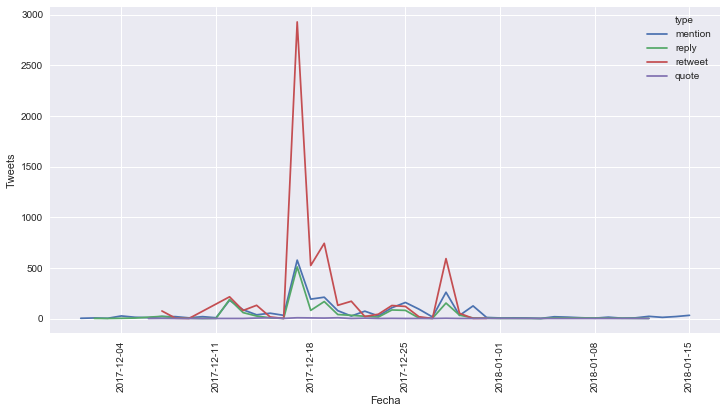

In [12]:
# draw and show the figure
# set figure size
plt.figure(figsize=(12,6))
fig = sns.lineplot(x='date', y='count', data=inter_santula_df, hue="type")
fig.set(xlabel='Fecha', ylabel='Tweets')
for item in fig.get_xticklabels():
    item.set_rotation(90)
plt.show()
#fig.get_figure().savefig("tweets_over_time_movimientos.png", dpi=200, quality=95)

##### Exclude the popular tweet

In [11]:
ui = UserInteractions()
inter_santula = ui.get_inter_received_user('Santula', exclude_tweet='942542308804833285')

In [12]:
inter_santula_df = pd.DataFrame(inter_santula)

In [13]:
inter_santula_df['date'] = inter_santula_df['date'].map(lambda x: datetime.strptime(x, '%m/%d/%y'))

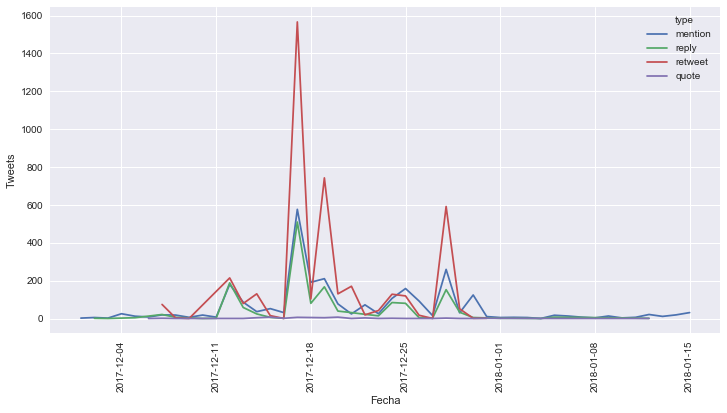

In [14]:
# draw and show the figure
# set figure size
plt.figure(figsize=(12,6))
fig = sns.lineplot(x='date', y='count', data=inter_santula_df, hue="type")
fig.set(xlabel='Fecha', ylabel='Tweets')
for item in fig.get_xticklabels():
    item.set_rotation(90)
plt.show()
#fig.get_figure().savefig("tweets_over_time_movimientos.png", dpi=200, quality=95)

##### Without retweets

In [185]:
inter_santula_df_no_rts = inter_santula_df[inter_santula_df['type']!='retweet']

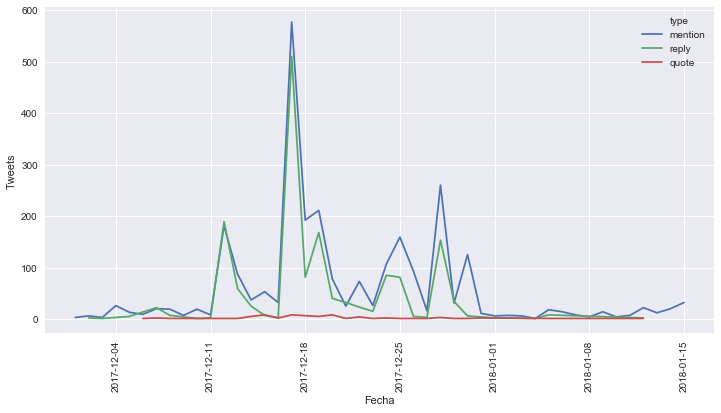

In [186]:
# draw and show the figure
# set figure size
plt.figure(figsize=(12,6))
fig = sns.lineplot(x='date', y='count', data=inter_santula_df_no_rts, hue="type")
fig.set(xlabel='Fecha', ylabel='Tweets')
for item in fig.get_xticklabels():
    item.set_rotation(90)
plt.show()
#fig.get_figure().savefig("tweets_over_time_movimientos.png", dpi=200, quality=95)

##### Only tweets from profiles related to HC

In [2]:
ui = UserInteractions()
inter_santula_hc = ui.get_inter_received_user('Santula', party='anr', movement='honor colorado')

In [3]:
inter_santula_hc_df = pd.DataFrame(inter_santula_hc)
inter_santula_hc_df.head()

,count,date,type
0,1,12/03/17,mention
1,5,12/13/17,reply
2,20,12/12/17,reply
3,18,12/12/17,mention
4,4,12/12/17,retweet


In [4]:
sum(inter_santula_hc_df[inter_santula_hc_df['type']!='retweet']['count'])

461

In [5]:
inter_santula_hc_df['date'] = inter_santula_hc_df['date'].map(lambda x: datetime.strptime(x, '%m/%d/%y'))

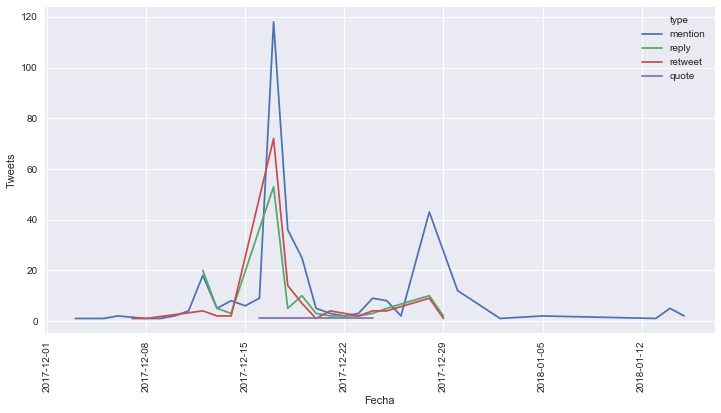

In [6]:
# draw and show the figure
# set figure size
plt.figure(figsize=(12,6))
fig = sns.lineplot(x='date', y='count', data=inter_santula_hc_df, hue="type")
fig.set(xlabel='Fecha', ylabel='Tweets')
for item in fig.get_xticklabels():
    item.set_rotation(90)
plt.show()
#fig.get_figure().savefig("tweets_over_time_movimientos.png", dpi=200, quality=95)

###### Without Rts

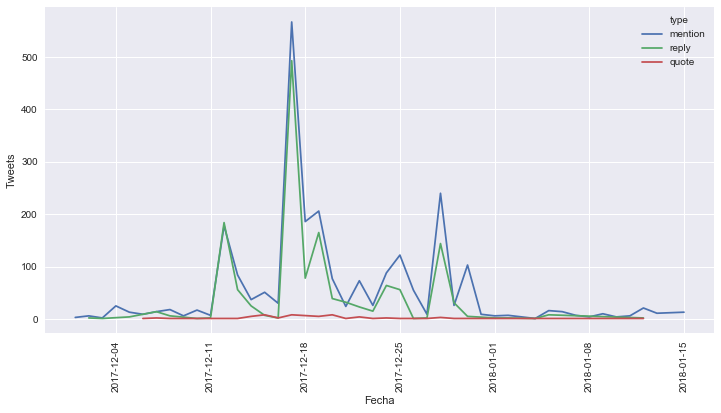

In [192]:
# draw and show the figure
# set figure size
plt.figure(figsize=(12,6))
fig = sns.lineplot(x='date', y='count', data=inter_santula_hc_df[inter_santula_hc_df['type']!='retweet'], hue="type")
fig.set(xlabel='Fecha', ylabel='Tweets')
for item in fig.get_xticklabels():
    item.set_rotation(90)
plt.show()
#fig.get_figure().savefig("tweets_over_time_movimientos.png", dpi=200, quality=95)

### Luis Bareiro (LuisBareiro)

In [172]:
na = NetworkAnalyzer()
inter_bareiro = na.get_out_interactions('LuisBareiro')

#### Interacciones generadas

In [287]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_bareiro['out_interactions']['total']['count'], \
             inter_bareiro['out_interactions']['retweets']['count'], \
             inter_bareiro['out_interactions']['replies']['count'], \
             inter_bareiro['out_interactions']['mentions']['count'], \
             inter_bareiro['out_interactions']['quotes']['count']))

17 tweets; 6 retweets, 10 respuestas, 1 menciones, y 0 citaciones


##### Perfiles más retuiteados

In [33]:
top_rts = []
out_inter_bareiro = inter_bareiro['out_interactions']['retweets']['details']
max_iter = 5 if len(out_inter_bareiro) > 5 else len(out_inter_bareiro)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_bareiro[i][0], 
                '2.Total retweets': out_inter_bareiro[i][1]
               }
    top_rts.append(contacto)
pd.DataFrame(top_rts)

,1.Perfil,2.Total retweets
0,AM_1080,2
1,latelePy,2
2,Santula,1
3,Dii_villalba,1


##### Perfiles a quiénes más respondió

In [288]:
rps = []
out_inter_bareiro = inter_bareiro['out_interactions']['replies']['details']
sorted_out_interactions = sorted(out_inter_bareiro.items(), key=lambda kv: kv[1], reverse=True)
for interaction in sorted_out_interactions:
    contacto = {'1.Perfil': interaction[0], 
                '2.Total respuestas': interaction[1],
                '3.PBB': float(all_users_df[all_users_df['screen_name']==interaction[0]]['pbb'])
               }
    rps.append(contacto)
rps_ba_df = pd.DataFrame(rps)
rps_ba_df.head()

,1.Perfil,2.Total respuestas,3.PBB
0,gabiotago,2,0.721404
1,DeaMaldonado,2,0.357405
2,DanielPatioReal,1,0.487682
3,ARDaz82798131,1,3.831324
4,vlamanchao,1,0.456753


**¿Cuántos de esos perfiles son bots?**

In [289]:
rp_ba_bots = rps_ba_df[rps_ba_df['3.PBB']>quantile_75]
print('De los {0} perfiles que respondieron, {1} son bots ({2}%)'.format(rps_ba_df.shape[0], 
                                                                         rp_ba_bots.shape[0],
                                                                         round(100*rp_ba_bots.shape[0]/rps_ba_df.shape[0],0)))
rp_ba_bots.sort_values('3.PBB', inplace=True, ascending=False)
rp_ba_bots.head()

De los 8 perfiles que respondieron, 5 son bots (62.0%)


/Users/jorgesaldivar/Dropbox/Development/politic-bots/env/lib/python3.4/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,1.Perfil,2.Total respuestas,3.PBB
3,ARDaz82798131,1,3.831324
5,IsidroRicardoV4,1,1.824115
7,jfrancovergara,1,1.748102
6,britez_ortiz1,1,0.899137
0,gabiotago,2,0.721404


#### Interacciones recibidas

In [173]:
inter_bareiro = na.get_in_interactions('LuisBareiro')

In [174]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_bareiro['in_interactions']['total']['count'], \
             inter_bareiro['in_interactions']['retweets']['count'], \
             inter_bareiro['in_interactions']['replies']['count'], \
             inter_bareiro['in_interactions']['mentions']['count'], \
             inter_bareiro['in_interactions']['quotes']['count']))

2938 tweets; 2680 retweets, 207 respuestas, 38 menciones, y 13 citaciones


##### Perfiles que más retuitearon sus publicaciones

In [176]:
rts = []
in_inter_bareiro = inter_bareiro['in_interactions']['retweets']['details']
sorted_in_interactions = sorted(in_inter_bareiro.items(), key=lambda kv: kv[1], reverse=True)
for interaction in sorted_in_interactions:
    try:
        pbb = float(all_users_df[all_users_df['screen_name']==interaction[0]]['pbb'])
    except:
        pbb = -1.0
    try:
        movement = all_users_df[all_users_df['screen_name']==interaction[0]]['movement'].values[0]
    except:
        movement = ''
    exists = dbu.search({'screen_name': interaction[0]})[0]['exists']
    contacto = {'1.Perfil': interaction[0], 
                '2.Total retweets': interaction[1],
                '3.PBB': float(pbb),
                '4.Movimiento': movement,
                '5.Exists': exists
               }
    rts.append(contacto)
rts_df = pd.DataFrame(rts)
rts_df.head()

,1.Perfil,2.Total citaciones,3.PBB,4.Movimiento,5.Exists
0,espiridion01,8,0.522269,None,1
1,GloriaB2B,2,0.396105,honor colorado,1
2,meli_Ovelar,1,0.505139,None,1
3,dieguitoknhet,1,0.491348,None,1
4,Fito_OrPa,1,0.366020,None,1


**¿Cuántos de esos perfiles son bots?**

In [177]:
cond1 = rts_df['5.Exists']==1
cond2 = rts_df['3.PBB']>thresholds['existing']
cond3 = rts_df['5.Exists']==0
cond4 = rts_df['3.PBB']>thresholds['no_existing']
rt_bots = rts_df[cond1 & cond2]
rt_bots.append(rts_df[cond3 & cond4])
rt_bots.shape

(50, 5)

In [178]:
print('De los {0} perfiles que retuitearon, {1} son bots ({2}%)'.format(rts_df.shape[0], 
                                                                        rt_bots.shape[0],
                                                                        round(100*rt_bots.shape[0]/rts_df.shape[0],0)))

De los 2672 perfiles que retuitearon, 50 son bots (2.0%)


Distribución de retuiteadores por movimiento

In [179]:
total_hc = rts_df[rts_df['4.Movimiento']=='colorado añetete'].shape[0]
total_ca = rts_df[rts_df['4.Movimiento']=='honor colorado'].shape[0]
print('Colorado Añeteté {0}'.format(total_hc))
print('Honor Colorado {0}'.format(total_ca))
print('Neutros {0}'.format(rts_df.shape[0]-(total_hc+total_ca)))

Colorado Añeteté 199
Honor Colorado 46
Neutros 2427


##### Perfiles que más respondieron a sus publicaciones

In [180]:
rps = []
in_inter_bareiro = inter_bareiro['in_interactions']['replies']['details']
sorted_in_interactions = sorted(in_inter_bareiro.items(), key=lambda kv: kv[1], reverse=True)
for interaction in sorted_in_interactions:
    try:
        pbb = float(all_users_df[all_users_df['screen_name']==interaction[0]]['pbb'])
    except:
        pbb = -1.0
    try:
        movement = all_users_df[all_users_df['screen_name']==interaction[0]]['movement'].values[0]
    except:
        movement = ''
    exists = dbu.search({'screen_name': interaction[0]})[0]['exists']
    contacto = {'1.Perfil': interaction[0], 
                '2.Total respuestas': interaction[1],
                '3.PBB': float(pbb),
                '4.Movimiento': movement,
                '5.Exists': exists
               }
    rps.append(contacto)
rps_df = pd.DataFrame(rps)
rps_df.head()

,1.Perfil,2.Total respuestas,3.PBB,4.Movimiento,5.Exists
0,rey_europa,5,1.393175,colorado añetete,1
1,britez_ortiz1,3,0.899137,None,1
2,DeaMaldonado,3,0.357405,None,1
3,Py_retrocede,2,6.596651,None,1
4,victorocampo88,2,0.290032,None,1


Distribución de respondedores por movimiento

In [181]:
total_hc = rps_df[rps_df['4.Movimiento']=='colorado añetete'].shape[0]
total_ca = rps_df[rps_df['4.Movimiento']=='honor colorado'].shape[0]
print('Colorado Añeteté {0}'.format(total_hc))
print('Honor Colorado {0}'.format(total_ca))
print('Neutros {0}'.format(rps_df.shape[0]-(total_hc+total_ca)))

Colorado Añeteté 21
Honor Colorado 19
Neutros 149


**¿Cuántos de esos perfiles son bots?**

In [182]:
cond1 = rps_df['5.Exists']==1
cond2 = rps_df['3.PBB']>thresholds['existing']
cond3 = rps_df['5.Exists']==0
cond4 = rps_df['3.PBB']>thresholds['no_existing']
rp_bots = rps_df[cond1 & cond2]
rp_bots.append(rps_df[cond3 & cond4])
rp_bots.shape

(24, 5)

In [183]:
print('De los {0} perfiles que respondieron, {1} son bots ({2}%)'.format(rps_df.shape[0], 
                                                                         rp_bots.shape[0],
                                                                         round(100*rp_bots.shape[0]/rps_df.shape[0],0)))

De los 189 perfiles que respondieron, 24 son bots (13.0%)


**¿De los 50 perfiles que más respondieron, cuantos son bots?**

In [185]:
sorted_rps = rps_df.sort_values('2.Total respuestas', ascending=False)
sorted_rps_50 = sorted_rps.head(50)
cond1 = sorted_rps_50['5.Exists']==1
cond2 = sorted_rps_50['3.PBB']>thresholds['existing']
cond3 = sorted_rps_50['5.Exists']==0
cond4 = sorted_rps_50['3.PBB']>thresholds['no_existing']
sorted_rps_50_bots = sorted_rps_50[cond1 & cond2]
sorted_rps_50_bots.append(sorted_rps_50[cond3 & cond4])
sorted_rps_50_bots.shape

(7, 5)

#### ¿Cuántos bots son HC?

In [186]:
rp_bots[rp_bots['4.Movimiento']=='honor colorado'].shape[0]

4

#### ¿Cuántos bots son Añeteté?

In [187]:
rp_bots[rp_bots['4.Movimiento']=='colorado añetete'].shape[0]

2

In [188]:
replies_bots = db.search({'tweet_obj.retweeted_status': {'$exists': 0},
                          'tweet_obj.in_reply_to_status_id_str': {'$ne': None},
                          'tweet_obj.in_reply_to_screen_name': {'$eq': 'LuisBareiro'},
                          'tweet_obj.is_quote_status': False,
                          'tweet_obj.user.screen_name': {'$in': list(rp_bots['1.Perfil'])}})

In [189]:
total_replies_bots = replies_bots.count()
pos_replies, neu_replies, neg_replies = 0, 0, 0
id_txt_replies = []
for reply in replies_bots:
    if reply['sentimiento']['tono'] == 'negative':
        neg_replies += 1
        if 'full_text' in reply['tweet_obj'].keys():
            id_txt_replies.append({'text': reply['tweet_obj']['full_text'], 
                                   'id': reply['tweet_obj']['id_str'],
                                   'author': reply['tweet_obj']['user']['screen_name']})
        else:
            id_txt_replies.append({'text': reply['tweet_obj']['text'], 
                                   'id': reply['tweet_obj']['id_str'],
                                   'author': reply['tweet_obj']['user']['screen_name']})
    if reply['sentimiento']['tono'] == 'neutral':
        neu_replies += 1
    if reply['sentimiento']['tono'] == 'positive':
        pos_replies += 1
print('Total replies: {0}'.format(total_replies_bots))
print('Positive replies: {0}'.format(pos_replies))
print('Neutral replies: {0}'.format(neu_replies))
print('Negative replies: {0}'.format(neg_replies))

Total replies: 26
Positive replies: 10
Neutral replies: 12
Negative replies: 4


In [190]:
id_txt_replies[:5]

[{'author': 'ARDaz82798131',
  'id': '942581207950417920',
  'text': '@LuisBareiro @SantiPenap Si la lista 2 de senadores tiene más votos que Santi, hay otra lectura. Si tuvo mas votos que Marito, peor. Ojalá sea castigo, pero dudo.'},
 {'author': 'Magni95990910',
  'id': '942562493066555392',
  'text': '@LuisBareiro @SantiPenap Lloren liberados.. no pudo ganar su titere..'},
 {'author': 'MariaelenaSugat',
  'id': '942566363289276417',
  'text': '@LuisBareiro @SantiPenap Uno ya se le saco un bandido menos falta tu AMIGO EL MAS BANDIDOS DE TODO KALE GALAVERNA Q ES SOCIO DE UDS PERIODISTAS'},
 {'author': 'Vctor84855402',
  'id': '942549985589153792',
  'text': '@LuisBareiro @SantiPenap Es una pena una persona con tanto conocimiento se dejo llevar por otra cosa@santipeña'}]

##### Perfiles que más mencionaron a LuisBareiro

In [192]:
mts = []
in_inter_bareiro = inter_bareiro['in_interactions']['mentions']['details']
sorted_in_interactions = sorted(in_inter_bareiro.items(), key=lambda kv: kv[1], reverse=True)
for interaction in sorted_in_interactions:
    try:
        pbb = float(all_users_df[all_users_df['screen_name']==interaction[0]]['pbb'])
    except:
        pbb = -1.0
    try:
        movement = all_users_df[all_users_df['screen_name']==interaction[0]]['movement'].values[0]
    except:
        movement = ''
    exists = dbu.search({'screen_name': interaction[0]})[0]['exists']
    contacto = {'1.Perfil': interaction[0], 
                '2.Total menciones': interaction[1],
                '3.PBB': float(pbb),
                '4.Movimiento': movement,
                '5.Exists': exists
               }
    mts.append(contacto)
mts_df = pd.DataFrame(mts)
mts_df.head()

,1.Perfil,2.Total menciones,3.PBB,4.Movimiento,5.Exists
0,CarlosZ86636382,6,0.575252,colorado añetete,0
1,caramarillapy,4,0.251158,None,1
2,agustinkonrad27,2,0.724941,None,1
3,Luinoguera,2,0.292720,None,1
4,maue_escobar,1,0.443622,None,1


**¿Cuántos de esos perfiles son bots?**

In [193]:
cond1 = mts_df['5.Exists']==1
cond2 = mts_df['3.PBB']>thresholds['existing']
cond3 = mts_df['5.Exists']==0
cond4 = mts_df['3.PBB']>thresholds['no_existing']
mts_bots = mts_df[cond1 & cond2]
mts_bots.append(mts_df[cond3 & cond4])
mts_bots.shape

(0, 5)

In [194]:
print('De los {0} perfiles que mencionaron, {1} son bots ({2}%)'.format(mts_df.shape[0], 
                                                                        mts_bots.shape[0],
                                                                        round(100*mts_bots.shape[0]/mts_df.shape[0],0)))
mts_bots.sort_values('2.Total menciones', inplace=True, ascending=False)
mts_bots.head()

De los 28 perfiles que mencionaron, 0 son bots (0.0%)


/Users/jorgesaldivar/Dropbox/Development/politic-bots/env/lib/python3.4/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,1.Perfil,2.Total menciones,3.PBB,4.Movimiento,5.Exists


##### Perfiles que más citaron a LuisBareiro

In [195]:
qts = []
in_inter_bareiro = inter_bareiro['in_interactions']['quotes']['details']
sorted_in_interactions = sorted(in_inter_bareiro.items(), key=lambda kv: kv[1], reverse=True)
for interaction in sorted_in_interactions:
    try:
        pbb = float(all_users_df[all_users_df['screen_name']==interaction[0]]['pbb'])
    except:
        pbb = -1.0
    try:
        movement = all_users_df[all_users_df['screen_name']==interaction[0]]['movement'].values[0]
    except:
        movement = ''
    exists = dbu.search({'screen_name': interaction[0]})[0]['exists']
    contacto = {'1.Perfil': interaction[0], 
                '2.Total citaciones': interaction[1],
                '3.PBB': float(pbb),
                '4.Movimiento': movement,
                '5.Exists': exists
               }
    qts.append(contacto)
qts_df = pd.DataFrame(qts)
qts_df.sort_values('3.PBB', inplace=True, ascending=False)
qts_df.head() 

,1.Perfil,2.Total citaciones,3.PBB,4.Movimiento,5.Exists
3,ANIBALCSPDS,1,0.663988,None,1
1,rossicav,1,0.602726,None,1
0,tallerluichi,1,0.581150,None,1
12,DnicCristaldo,1,0.557738,None,1
8,gildaruizz,1,0.484084,None,1


**¿Cuántos de esos perfiles son bots?**

In [196]:
cond1 = qts_df['5.Exists']==1
cond2 = qts_df['3.PBB']>thresholds['existing']
cond3 = qts_df['5.Exists']==0
cond4 = qts_df['3.PBB']>thresholds['no_existing']
qts_bots = qts_df[cond1 & cond2]
qts_bots.append(qts_df[cond3 & cond4])
qts_bots.shape

(0, 5)

In [197]:
print('De los {0} perfiles que mencionaron, {1} son bots ({2}%)'.format(qts_df.shape[0], 
                                                                        qts_bots.shape[0],
                                                                        round(100*qts_bots.shape[0]/qts_df.shape[0],0)))
qts_bots.sort_values('2.Total citaciones', inplace=True, ascending=False)

De los 13 perfiles que mencionaron, 0 son bots (0.0%)


/Users/jorgesaldivar/Dropbox/Development/politic-bots/env/lib/python3.4/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### En total, ¿cuántos perfiles del tipo interactuaron con LuisBareiro?

In [198]:
# Get list of bots
all_bots_lb = []
all_bots_lb.extend(list(rt_bots['1.Perfil']))
all_bots_lb.extend(list(rp_bots['1.Perfil']))
all_bots_lb.extend(list(mts_bots['1.Perfil']))
all_bots_lb.extend(list(qts_bots['1.Perfil']))
# Get list of all profiles
all_prof_lb = []
all_prof_lb.extend(list(rts_df['1.Perfil']))
all_prof_lb.extend(list(rps_df['1.Perfil']))
all_prof_lb.extend(list(mts_df['1.Perfil']))
all_prof_lb.extend(list(qts_df['1.Perfil']))
print('Del total {0} perfiles que interacturaron con Luis Bareiro, {1} son del tipo bot'.format(
      len(set(all_prof_lb)),
      len(set(all_bots_lb))))

Del total 2877 perfiles que interacturaron con Luis Bareiro, 71 son del tipo bot


#### Interacciones recibidas a lo largo del tiempo 

In [45]:
ui = UserInteractions()
inter_lb = ui.get_inter_received_user('LuisBareiro')

In [46]:
inter_lb_df = pd.DataFrame(inter_lb)

In [47]:
from datetime import datetime
inter_lb_df['date'] = inter_lb_df['date'].map(lambda x: datetime.strptime(x, '%m/%d/%y'))

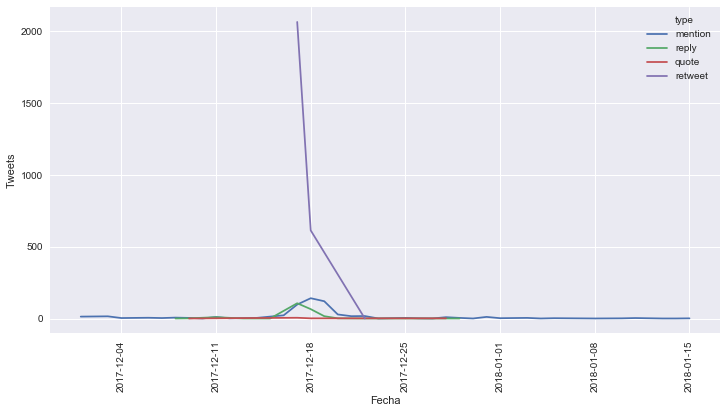

In [48]:
# draw and show the figure
# set figure size
plt.figure(figsize=(12,6))
fig = sns.lineplot(x='date', y='count', data=inter_lb_df, hue="type")
fig.set(xlabel='Fecha', ylabel='Tweets')
for item in fig.get_xticklabels():
    item.set_rotation(90)
plt.show()
#fig.get_figure().savefig("tweets_over_time_movimientos.png", dpi=200, quality=95)

### Enrique Vargas Peña (enriquevp)

In [41]:
na = NetworkAnalyzer()
inter_evp = na.get_interactions('enriquevp')

#### Interacciones generadas

In [42]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_evp['out_interactions']['total']['count'], \
             inter_evp['out_interactions']['retweets']['count'], \
             inter_evp['out_interactions']['replies']['count'], \
             inter_evp['out_interactions']['mentions']['count'], \
             inter_evp['out_interactions']['quotes']['count']))

153 tweets; 16 retweets, 48 respuestas, 81 menciones, y 8 citaciones


##### Perfiles más retuiteados

In [43]:
top_rts = []
out_inter_evp = inter_evp['out_interactions']['retweets']['details']
max_iter = 5 if len(out_inter_evp) > 5 else len(out_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_evp[i][0], 
                '2.Total retweets': out_inter_evp[i][1]
               }
    top_rts.append(contacto)
pd.DataFrame(top_rts)

,1.Perfil,2.Total retweets
0,Santula,4
1,patriaquerida,3
2,EfrainAlegre,2
3,ABCCardinal,2
4,JavierSanchezPy,1


##### Perfiles a los que más respondió

In [44]:
top_rps = []
out_inter_evp = inter_evp['out_interactions']['replies']['details']
max_iter = 5 if len(out_inter_evp) > 5 else len(out_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_evp[i][0], 
                '2.Total respuestas': out_inter_evp[i][1]
               }
    top_rps.append(contacto)
pd.DataFrame(top_rps)

,1.Perfil,2.Total respuestas
0,MaritoAbdo,17
1,SantiPenap,6
2,fidelzavala2018,6
3,gduartcacavelos,4
4,sebavillarejo,4


##### Perfiles más mencionados

In [45]:
top_mts = []
out_inter_evp = inter_evp['out_interactions']['mentions']['details']
max_iter = 5 if len(out_inter_evp) > 5 else len(out_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_evp[i][0], 
                '2.Total menciones': out_inter_evp[i][1]
               }
    top_mts.append(contacto)
pd.DataFrame(top_mts)

,1.Perfil,2.Total menciones
0,SantiPenap,27
1,MaritoAbdo,17
2,SinLimites_RG,6
3,EfrainAlegre,5
4,patriaquerida,4


##### Perfiles más citados

In [46]:
top_qts = []
out_inter_evp = inter_evp['out_interactions']['quotes']['details']
max_iter = 5 if len(out_inter_evp) > 5 else len(out_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_evp[i][0], 
                '2.Total citaciones': out_inter_evp[i][1]
               }
    top_qts.append(contacto)
pd.DataFrame(top_qts)

,1.Perfil,2.Total citaciones
0,ABCDigital,2
1,jotabernabe,2
2,Copanosetoca,1
3,smongelos,1
4,sandralopezpy,1


#### Interacciones recibidas

In [47]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_evp['in_interactions']['total']['count'], \
             inter_evp['in_interactions']['retweets']['count'], \
             inter_evp['in_interactions']['replies']['count'], \
             inter_evp['in_interactions']['mentions']['count'], \
             inter_evp['in_interactions']['quotes']['count']))

2762 tweets; 2054 retweets, 654 respuestas, 43 menciones, y 11 citaciones


##### Perfiles que más retuitearon sus publicaciones

In [48]:
top_rts = []
in_inter_evp = inter_evp['in_interactions']['retweets']['details']
max_iter = 5 if len(in_inter_evp) > 5 else len(in_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_evp[i][0], 
                '2.Total retweets': in_inter_evp[i][1]
               }
    top_rts.append(contacto)
pd.DataFrame(top_rts)

,1.Perfil,2.Total retweets
0,fabiansolis_,25
1,Norabeli,24
2,Roberto73467377,22
3,marcosacua2,21
4,Beatriz20D,19


##### Perfiles que más respondieron a sus publicaciones

In [49]:
top_rps = []
in_inter_evp = inter_evp['in_interactions']['replies']['details']
max_iter = 5 if len(in_inter_evp) > 5 else len(in_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_evp[i][0], 
                '2.Total respuestas': in_inter_evp[i][1]
               }
    top_rps.append(contacto)
pd.DataFrame(top_rps)

,1.Perfil,2.Total respuestas
0,Verogot,14
1,Avorivas,12
2,AlamVera2,12
3,keito_sanchez,8
4,GloriaRiego2,8


##### Perfiles que más mencionaron a enriquevp 

In [51]:
top_mts = []
in_inter_evp = inter_evp['in_interactions']['mentions']['details']
max_iter = 5 if len(in_inter_evp) > 5 else len(in_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_evp[i][0], 
                '2.Total menciones': in_inter_evp[i][1]
               }
    top_mts.append(contacto)
pd.DataFrame(top_mts)

,1.Perfil,2.Total menciones
0,caramarillapy,5
1,Maxnarvezmatto,4
2,JoseRamirezZela,2
3,minaftv,2
4,UribeQuerubin,1


##### Perfiles que más citaron sus publicaciones

In [52]:
top_qts = []
in_inter_evp = inter_evp['in_interactions']['quotes']['details']
max_iter = 5 if len(in_inter_evp) > 5 else len(in_inter_evp)
for i in range(max_iter):
    contacto = {'1.Perfil': in_inter_evp[i][0], 
                '2.Total citaciones': in_inter_evp[i][1]
               }
    top_qts.append(contacto)
pd.DataFrame(top_qts)

,1.Perfil,2.Total citaciones
0,chintuoviedo,1
1,Clyde_VolkartOf,1
2,desimasi2,1
3,Avorivas,1
4,gio_martinez88,1


### Desireè Masi (desimasi2)

In [199]:
na = NetworkAnalyzer()
inter_dm = na.get_out_interactions('desimasi2')

##### Interacciones generadas

In [271]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_dm['out_interactions']['total']['count'], \
             inter_dm['out_interactions']['retweets']['count'], \
             inter_dm['out_interactions']['replies']['count'], \
             inter_dm['out_interactions']['mentions']['count'], \
             inter_dm['out_interactions']['quotes']['count']))

235 tweets; 26 retweets, 59 respuestas, 113 menciones, y 37 citaciones


##### Perfiles más retuiteados

In [56]:
top_rts = []
out_inter_dm = inter_dm['out_interactions']['retweets']['details']
max_iter = 5 if len(out_inter_dm) > 5 else len(out_inter_dm)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_dm[i][0], 
                '2.Total retweets': out_inter_dm[i][1]
               }
    top_rts.append(contacto)
pd.DataFrame(top_rts)

,1.Perfil,2.Total retweets
0,StibenPatron,2
1,EfrainAlegre,2
2,enriquevp,2
3,Raquel_1634,1
4,gernhof,1


##### Perfiles a los que más respondió

In [272]:
rps_out = []
out_inter_dm = inter_dm['out_interactions']['replies']['details']
sorted_out_interactions = sorted(out_inter_dm.items(), key=lambda kv: kv[1], reverse=True)
for interaction in sorted_out_interactions:
    contacto = {'1.Perfil': interaction[0], 
                '2.Total respuestas': interaction[1],
                '3.PBB': float(all_users_df[all_users_df['screen_name']==interaction[0]]['pbb'])
               }
    rps_out.append(contacto)
rps_out_df = pd.DataFrame(rps_out)
rps_out_df.head()

,1.Perfil,2.Total respuestas,3.PBB
0,andregp87,4,0.419268
1,Rolando35503217,3,9.815278
2,smongelos,2,0.440155
3,neonecio,2,0.563443
4,Carlito25Baz,2,1.562724


**¿Cuántos de esos perfiles son bots?**

In [273]:
rps_out_bots = rps_out_df[rps_out_df['3.PBB']>quantile_75]
print('De los {0} perfiles a los que respondió, {1} son bots ({2}%)'.format(rps_out_df.shape[0], 
                                                                        rps_out_bots.shape[0],
                                                                        round(100*rps_out_bots.shape[0]/rps_out_df.shape[0],0)))
rps_out_bots.sort_values('2.Total respuestas', inplace=True, ascending=False)
rps_out_bots.head()

De los 49 perfiles a los que respondió, 12 son bots (24.0%)


/Users/jorgesaldivar/Dropbox/Development/politic-bots/env/lib/python3.4/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,1.Perfil,2.Total respuestas,3.PBB
1,Rolando35503217,3,9.815278
4,Carlito25Baz,2,1.562724
7,Beatriz20D,1,0.744348
9,majorjuan91,1,2.696898
14,ElGalho,1,0.776139


##### Perfiles a los que más mencionó

In [58]:
top_mts = []
out_inter_dm = inter_dm['out_interactions']['mentions']['details']
max_iter = 5 if len(out_inter_dm) > 5 else len(out_inter_dm)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_dm[i][0], 
                '2.Total menciones': out_inter_dm[i][1]
               }
    top_mts.append(contacto)
pd.DataFrame(top_mts)

,1.Perfil,2.Total menciones
0,Horacio_Cartes,36
1,EfrainAlegre,7
2,fidelzavala2018,7
3,Estelaruizdiaz,6
4,SantiPenap,5


##### Perfiles a los que más citó

In [59]:
top_qts = []
out_inter_dm = inter_dm['out_interactions']['quotes']['details']
max_iter = 5 if len(out_inter_dm) > 5 else len(out_inter_dm)
for i in range(max_iter):
    contacto = {'1.Perfil': out_inter_dm[i][0], 
                '2.Total citaciones': out_inter_dm[i][1]
               }
    top_qts.append(contacto)
pd.DataFrame(top_qts)

,1.Perfil,2.Total citaciones
0,eottolenghi,5
1,UltimaHoracom,5
2,EfrainAlegre,3
3,ABCCardinal,3
4,desimasi2,3


#### Interacciones recibidas

In [200]:
inter_dm = na.get_in_interactions('desimasi2')

In [201]:
print('{0} tweets; {1} retweets, {2} respuestas, {3} menciones, y {4} citaciones'. \
      format(inter_dm['in_interactions']['total']['count'], \
             inter_dm['in_interactions']['retweets']['count'], \
             inter_dm['in_interactions']['replies']['count'], \
             inter_dm['in_interactions']['mentions']['count'], \
             inter_dm['in_interactions']['quotes']['count']))

2516 tweets; 1735 retweets, 729 respuestas, 40 menciones, y 12 citaciones


##### Perfiles que más retuitean sus publicaciones

In [209]:
rts_in = []
in_inter_dm = inter_dm['in_interactions']['retweets']['details']
sorted_in_interactions = sorted(in_inter_dm.items(), key=lambda kv: kv[1], reverse=True)
for interaction in sorted_in_interactions:
    try:
        pbb = float(all_users_df[all_users_df['screen_name']==interaction[0]]['pbb'])
    except:
        pbb = -1.0
    try:
        movement = all_users_df[all_users_df['screen_name']==interaction[0]]['movement'].values[0]
    except:
        movement = ''
    exists = dbu.search({'screen_name': interaction[0]})[0]['exists']
    contacto = {'1.Perfil': interaction[0], 
                '2.Total retweets': interaction[1],
                '3.PBB': float(pbb),
                '4.Movimiento': movement,
                '5.Exists': exists
               }
    rts_in.append(contacto)
rts_in_df = pd.DataFrame(rts_in)
rts_in_df.head()

,1.Perfil,2.Total retweets,3.PBB,4.Movimiento,5.Exists
0,gladysgulino,36,0.348731,None,1
1,Norabeli,35,0.385551,colorado añetete,1
2,Beatriz20D,28,0.744348,colorado añetete,1
3,pdpprogresista,20,0.399427,None,1
4,marcosacua2,19,0.450398,None,1


**Distribución de retuiteadores por movimiento**

In [203]:
total_hc = rts_in_df[rts_in_df['4.Movimiento']=='colorado añetete'].shape[0]
total_ca = rts_in_df[rts_in_df['4.Movimiento']=='honor colorado'].shape[0]
print('Colorado Añeteté {0}'.format(total_hc))
print('Honor Colorado {0}'.format(total_ca))
print('Neutros {0}'.format(rts_in_df.shape[0]-(total_hc+total_ca)))

Colorado Añeteté 187
Honor Colorado 16
Neutros 609


**¿Cuántos de esos perfiles son bots?**

In [211]:
cond1 = rts_in_df['5.Exists']==1
cond2 = rts_in_df['3.PBB']>thresholds['existing']
cond3 = rts_in_df['5.Exists']==0
cond4 = rts_in_df['3.PBB']>thresholds['no_existing']
rts_in_bots = rts_in_df[cond1 & cond2]
rts_in_bots.append(rts_in_df[cond3 & cond4])
print(rts_in_bots.shape)
rts_in_bots.head()

(21, 5)


,1.Perfil,2.Total retweets,3.PBB,4.Movimiento,5.Exists
103,Isabeaalonso,3,2.902394,None,1
144,PedroPa55787924,3,3.245791,None,1
203,CsarQuintana7,2,4.442922,None,1
224,Gustavo72738870,2,4.609132,None,1
230,juan_sosal,2,3.251722,None,1


In [212]:
print('De los {0} perfiles a los que hicieron retweet, {1} son bots ({2}%)'.format(rts_in_df.shape[0], 
                                                                            rts_in_bots.shape[0],
                                                                            round(100*rts_in_bots.shape[0]/rts_in_df.shape[0],0)))
rts_in_bots.sort_values('2.Total retweets', inplace=True, ascending=False)
rts_in_bots.head()

De los 812 perfiles a los que hicieron retweet, 21 son bots (3.0%)


/Users/jorgesaldivar/Dropbox/Development/politic-bots/env/lib/python3.4/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,1.Perfil,2.Total retweets,3.PBB,4.Movimiento,5.Exists
103,Isabeaalonso,3,2.902394,None,1
144,PedroPa55787924,3,3.245791,None,1
203,CsarQuintana7,2,4.442922,None,1
224,Gustavo72738870,2,4.609132,None,1
230,juan_sosal,2,3.251722,None,1


##### Perfiles que más respondieron a sus publicaciones

In [217]:
rps_in = []
in_inter_dm = inter_dm['in_interactions']['replies']['details']
sorted_in_interactions = sorted(in_inter_dm.items(), key=lambda kv: kv[1], reverse=True)
for interaction in sorted_in_interactions:
    try:
        pbb = float(all_users_df[all_users_df['screen_name']==interaction[0]]['pbb'])
    except:
        pbb = -1.0
    try:
        movement = all_users_df[all_users_df['screen_name']==interaction[0]]['movement'].values[0]
    except:
        movement = ''
    exists = dbu.search({'screen_name': interaction[0]})[0]['exists']
    contacto = {'1.Perfil': interaction[0], 
                '2.Total respuestas': interaction[1],
                '3.PBB': float(pbb),
                '4.Movimiento': movement,
                '5.Exists': exists
               }
    rps_in.append(contacto)
rps_in_df = pd.DataFrame(rps_in)
rps_in_df.head()

,1.Perfil,2.Total respuestas,3.PBB,4.Movimiento,5.Exists
0,AlamVera2,11,0.339423,colorado añetete,1
1,DardoCastelluc1,10,0.551256,None,1
2,andregp87,7,-1.000000,,1
3,Carlito25Baz,7,1.562724,None,1
4,JavierQ52935829,6,-1.000000,,1


**Distribución de respondedores por movimiento**

In [214]:
total_hc = rps_in_df[rps_in_df['4.Movimiento']=='colorado añetete'].shape[0]
total_ca = rps_in_df[rps_in_df['4.Movimiento']=='honor colorado'].shape[0]
print('Colorado Añeteté {0}'.format(total_hc))
print('Honor Colorado {0}'.format(total_ca))
print('Neutros {0}'.format(rps_in_df.shape[0]-(total_hc+total_ca)))

Colorado Añeteté 54
Honor Colorado 22
Neutros 449


**¿Cuántos de esos perfiles son bots?**

In [219]:
cond1 = rps_in_df['5.Exists']==1
cond2 = rps_in_df['3.PBB']>thresholds['existing']
cond3 = rps_in_df['5.Exists']==0
cond4 = rps_in_df['3.PBB']>thresholds['no_existing']
rps_in_bots = rps_in_df[cond1 & cond2]
rps_in_bots.append(rps_in_df[cond3 & cond4])
rps_in_bots.shape

(43, 5)

In [216]:
print('De los {0} perfiles a los que respondió, {1} son bots ({2}%)'.format(rps_in_df.shape[0], 
                                                                            rps_in_bots.shape[0],
                                                                            round(100*rps_in_bots.shape[0]/rps_in_df.shape[0],0)))

De los 525 perfiles a los que respondió, 43 son bots (8.0%)


**De los 50 que más respondieron, ¿Cuántos son bots?**

In [239]:
s_rps_in = rps_in_df.sort_values('2.Total respuestas', ascending=False)
most_active_repliers = s_rps_in.head(50)
cond1 = most_active_repliers['5.Exists']==1
cond2 = most_active_repliers['3.PBB']>thresholds['existing']
cond3 = most_active_repliers['5.Exists']==0
cond4 = most_active_repliers['3.PBB']>thresholds['no_existing']
most_active_repliers_b = most_active_repliers[cond1 & cond2]
most_active_repliers_b.append(most_active_repliers[cond3 & cond4])
most_active_repliers_b.shape[0]

3

#### ¿Cuántos bots son HC?

In [226]:
rps_in_bots[rps_in_bots['4.Movimiento']=='honor colorado'].shape[0]

1

#### ¿Cuántos bots son Añeteté?

In [227]:
rps_in_bots[rps_in_bots['4.Movimiento']=='colorado añetete'].shape[0]

3

In [228]:
replies_bots = db.search({'tweet_obj.retweeted_status': {'$exists': 0},
                          'tweet_obj.in_reply_to_status_id_str': {'$ne': None},
                          'tweet_obj.in_reply_to_screen_name': {'$eq': 'desimasi2'},
                          'tweet_obj.is_quote_status': False,
                          'tweet_obj.user.screen_name': {'$in': list(rps_in_bots['1.Perfil'])}})

In [229]:
total_replies_bots = replies_bots.count()
pos_replies, neu_replies, neg_replies = 0, 0, 0
id_txt_replies = []
for reply in replies_bots:
    if reply['sentimiento']['tono'] == 'negative':
        neg_replies += 1
        if 'full_text' in reply['tweet_obj'].keys():
            id_txt_replies.append({'text': reply['tweet_obj']['full_text'], 
                                   'id': reply['tweet_obj']['id_str'],
                                   'author': reply['tweet_obj']['user']['screen_name']})
        else:
            id_txt_replies.append({'text': reply['tweet_obj']['text'], 
                                   'id': reply['tweet_obj']['id_str'],
                                   'author': reply['tweet_obj']['user']['screen_name']})
    if reply['sentimiento']['tono'] == 'neutral':
        neu_replies += 1
    if reply['sentimiento']['tono'] == 'positive':
        pos_replies += 1
print('Total replies: {0}'.format(total_replies_bots))
print('Positive replies: {0}'.format(pos_replies))
print('Neutral replies: {0}'.format(neu_replies))
print('Negative replies: {0}'.format(neg_replies))

Total replies: 60
Positive replies: 20
Neutral replies: 32
Negative replies: 8


In [230]:
id_txt_replies[:5]

[{'author': 'Crlosferreira3',
  'id': '938383041268940800',
  'text': '@desimasi2 @Horacio_Cartes Con lo de ayer no creo ,pero cara dura como el creo queseva&amp;&amp;&amp;&amp;&amp;&amp;'},
 {'author': 'Guiller14615672',
  'id': '952284974098599936',
  'text': '@desimasi2 @Horacio_Cartes Y tu marido cuando estuvo de ministro del interior que hizo aparte de llenarse los bolsillos???? Por que no lucho para que se evite todo esto!!!!'},
 {'author': 'Odiomistweet',
  'id': '951848218513600512',
  'text': '@desimasi2 @Horacio_Cartes En un pais serio? Con el Parlamento circense que tenemos? Con un pdte. que no sabe donde está? Con un intendente Dj? Con candidatos de la farándula para el Parlamento?'},
 {'author': 'RiveroaJuan',
  'id': '952222027162759171',
  'text': '@desimasi2 @Horacio_Cartes Este hc es el mismiso satanas en persona..para el es solo una muerte mas...indolente...qe se vaya a su  ksa con todos sus secuaces...'},
 {'author': 'Rolando35503217',
  'id': '937429449619976192',
 

##### Perfiles que más mencionaron a desimasi2

In [231]:
mts_in = []
in_inter_dm = inter_dm['in_interactions']['mentions']['details']
sorted_in_interactions = sorted(in_inter_dm.items(), key=lambda kv: kv[1], reverse=True)
for interaction in sorted_in_interactions:
    try:
        pbb = float(all_users_df[all_users_df['screen_name']==interaction[0]]['pbb'])
    except:
        pbb = -1.0
    try:
        movement = all_users_df[all_users_df['screen_name']==interaction[0]]['movement'].values[0]
    except:
        movement = ''
    exists = dbu.search({'screen_name': interaction[0]})[0]['exists']
    contacto = {'1.Perfil': interaction[0], 
                '2.Total menciones': interaction[1],
                '3.PBB': float(pbb),
                '4.Movimiento': movement,
                '5.Exists': exists
               }
    mts_in.append(contacto)
mts_in_df = pd.DataFrame(mts_in)
mts_in_df.head()

,1.Perfil,2.Total menciones,3.PBB,4.Movimiento,5.Exists
0,ANIBALCSPDS,3,0.663988,None,1
1,smongelos,2,-1.000000,,0
2,JoseRamirezZela,2,0.330245,colorado añetete,1
3,eottolenghi,2,0.313151,None,1
4,Maxnarvezmatto,2,0.331122,colorado añetete,1


**¿Cuántos de esos perfiles son bots?**

In [232]:
cond1 = mts_in_df['5.Exists']==1
cond2 = mts_in_df['3.PBB']>thresholds['existing']
cond3 = mts_in_df['5.Exists']==0
cond4 = mts_in_df['3.PBB']>thresholds['no_existing']
mts_in_bots = mts_in_df[cond1 & cond2]
mts_in_bots.append(mts_in_df[cond3 & cond4])
mts_in_bots.shape

(0, 5)

In [233]:
print('De los {0} perfiles que la mencionaron, {1} son bots ({2}%)'.format(mts_in_df.shape[0], 
                                                                           mts_in_bots.shape[0],
                                                                           round(100*mts_in_bots.shape[0]/mts_in_df.shape[0],0)))
mts_in_bots.sort_values('2.Total menciones', inplace=True, ascending=False)
mts_in_bots.head()

De los 33 perfiles que la mencionaron, 0 son bots (0.0%)


/Users/jorgesaldivar/Dropbox/Development/politic-bots/env/lib/python3.4/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,1.Perfil,2.Total menciones,3.PBB,4.Movimiento,5.Exists


##### Perfiles que más citaron sus publicaciones

In [235]:
qts_in = []
in_inter_dm = inter_dm['in_interactions']['quotes']['details']
sorted_in_interactions = sorted(in_inter_dm.items(), key=lambda kv: kv[1], reverse=True)
for interaction in sorted_in_interactions:
    try:
        pbb = float(all_users_df[all_users_df['screen_name']==interaction[0]]['pbb'])
    except:
        pbb = -1.0
    try:
        movement = all_users_df[all_users_df['screen_name']==interaction[0]]['movement'].values[0]
    except:
        movement = ''
    exists = dbu.search({'screen_name': interaction[0]})[0]['exists']
    contacto = {'1.Perfil': interaction[0], 
                '2.Total citaciones': interaction[1],
                '3.PBB': float(pbb),
                '4.Movimiento': movement,
                '5.Exists': exists
               }
    qts_in.append(contacto)
qts_in_df = pd.DataFrame(qts_in)
qts_in_df.head()

,1.Perfil,2.Total citaciones,3.PBB,4.Movimiento,5.Exists
0,cgonzalezmir,1,0.433462,None,1
1,ernes_baez,1,0.415670,progresista colorado,1
2,Nosoy1rroba,1,0.498804,None,1
3,vbgaikon,1,0.771509,None,1
4,arturodoldan,1,0.193404,None,1


**¿Cuántos de esos perfiles son bots?**

In [236]:
cond1 = qts_in_df['5.Exists']==1
cond2 = qts_in_df['3.PBB']>thresholds['existing']
cond3 = qts_in_df['5.Exists']==0
cond4 = qts_in_df['3.PBB']>thresholds['no_existing']
qts_in_bots = qts_in_df[cond1 & cond2]
qts_in_bots.append(qts_in_df[cond3 & cond4])
qts_in_bots.shape

(0, 5)

In [237]:
print('De los {0} perfiles que la citaron, {1} son bots ({2}%)'.format(qts_in_df.shape[0], 
                                                                       qts_in_bots.shape[0],
                                                                       round(100*qts_in_bots.shape[0]/qts_in_df.shape[0],0)))
qts_in_bots.sort_values('2.Total citaciones', inplace=True, ascending=False)
qts_in_bots.head()

De los 12 perfiles que la citaron, 0 son bots (0.0%)


/Users/jorgesaldivar/Dropbox/Development/politic-bots/env/lib/python3.4/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,1.Perfil,2.Total citaciones,3.PBB,4.Movimiento,5.Exists


#### En total, ¿cuántos perfiles del tipo interactuaron con Desireè Masi?

In [238]:
# Get list of bots
all_bots_dm = []
all_bots_dm.extend(list(rts_in_bots['1.Perfil']))
all_bots_dm.extend(list(rps_in_bots['1.Perfil']))
all_bots_dm.extend(list(mts_in_bots['1.Perfil']))
all_bots_dm.extend(list(qts_in_bots['1.Perfil']))
# Get list of all profiles
all_prof_dm = []
all_prof_dm.extend(list(rts_in_df['1.Perfil']))
all_prof_dm.extend(list(rps_in_df['1.Perfil']))
all_prof_dm.extend(list(mts_in_df['1.Perfil']))
all_prof_dm.extend(list(qts_in_df['1.Perfil']))
print('Del total {0} perfiles que interacturaron con desimasi2, {1} son del tipo bot'.format(
      len(set(all_prof_dm)),
      len(set(all_bots_dm))))

Del total 1251 perfiles que interacturaron con desimasi2, 62 son del tipo bot


#### Interacciones recibidas a lo largo del tiempo 

In [82]:
ui = UserInteractions()
inter_dm = ui.get_inter_received_user('desimasi2')

In [83]:
inter_dm_df = pd.DataFrame(inter_dm)

In [84]:
from datetime import datetime
inter_dm_df['date'] = inter_dm_df['date'].map(lambda x: datetime.strptime(x, '%m/%d/%y'))

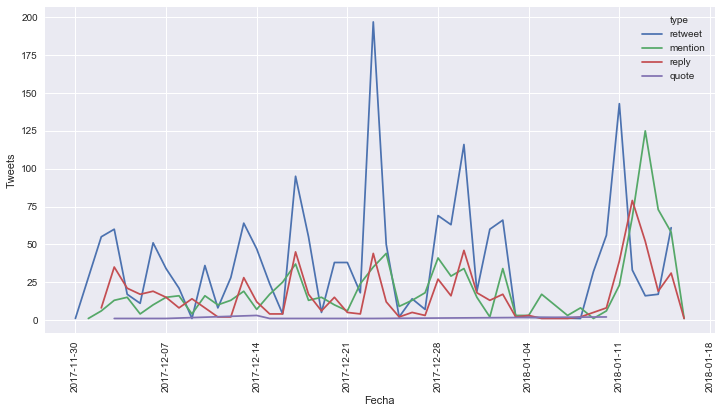

In [85]:
# draw and show the figure
# set figure size
plt.figure(figsize=(12,6))
fig = sns.lineplot(x='date', y='count', data=inter_dm_df, hue="type")
fig.set(xlabel='Fecha', ylabel='Tweets')
for item in fig.get_xticklabels():
    item.set_rotation(90)
plt.show()
#fig.get_figure().savefig("tweets_over_time_movimientos.png", dpi=200, quality=95)

#### Cuantos bots comparte Desiré Masi con Luis Bareiro y Santiago González?

In [240]:
unique_bots_dm = set(all_bots_dm)
len(unique_bots_dm)

62

In [241]:
unique_bots_lb = set(all_bots_lb)
len(unique_bots_lb)

71

In [243]:
unique_bots_st = set(all_bots_st)
len(unique_bots_st)

179

Comunes Santula y Luis Bareiro

In [244]:
len(set.intersection(unique_bots_lb, unique_bots_st))

16

In [245]:
len(unique_bots_lb^unique_bots_st)

218

Comunes Santula y Desirée

In [246]:
len(set.intersection(unique_bots_dm, unique_bots_st))

17

In [247]:
len(unique_bots_dm^unique_bots_st)

207

Comunies Luis Bareiro y Desirée

In [248]:
len(set.intersection(unique_bots_dm, unique_bots_lb))

5

In [249]:
len(unique_bots_dm^unique_bots_lb)

123

Comunes Luis Bareiro, Desirée, Santula

In [250]:
comunes_3 = set.intersection(unique_bots_dm, unique_bots_lb, unique_bots_st)

In [251]:
for comun in comunes_3:
    user = dbu.search({'screen_name': comun})
    print('Name: {0}, Party:{1}, Movement:{2}'.format(comun, user[0]['party'], user[0]['movement']))

Name: juan_sosal, Party:anr, Movement:None
Name: majorjuan91, Party:anr, Movement:colorado añetete
Name: PedroPa55787924, Party:anr, Movement:None


In [252]:
len(comunes_3)

3

In [253]:
bots_all_3 = unique_bots_dm ^ unique_bots_lb
bots_all_3 = bots_all_3 ^ unique_bots_st
len(bots_all_3)

248